# Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

To examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df= df.drop_duplicates()

In [5]:
df.shape

(7043, 21)

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# We can see there no null values so we are good to proceed further!

In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
df.nunique().to_frame("Unique values")

,Unique values
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


In [10]:
# we can drop customerID since it is unique and has to effect on our prediction column.

In [11]:
df.drop('customerID',axis=1,inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [13]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [14]:
# we can see there are 17 object type columns and 3 integer or float type columns

In [15]:
# no. of object data types:

object_datatypes=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='O':
        object_datatypes.append(x)
object_datatypes

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [17]:
# no. of integer data types:

integer_datatypes=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='int64':
      integer_datatypes.append(x)
integer_datatypes 

['SeniorCitizen', 'tenure']

In [19]:
# no. of float data types:

float_datatypes=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='float64':
      float_datatypes.append(x)
float_datatypes 

['MonthlyCharges']

In [20]:
# EDA and Visualization

In [21]:
# countplot for object types features

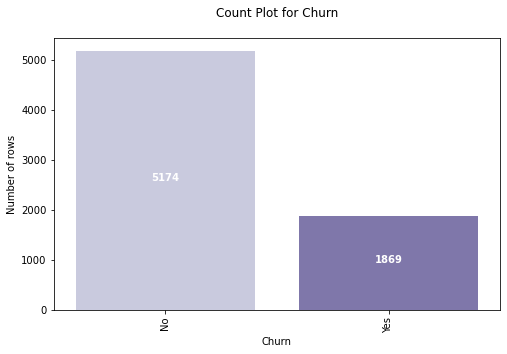

In [23]:
plt.figure(figsize=(8,5))
col_name = 'Churn'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="Purples")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='tenure', ylabel='count'>

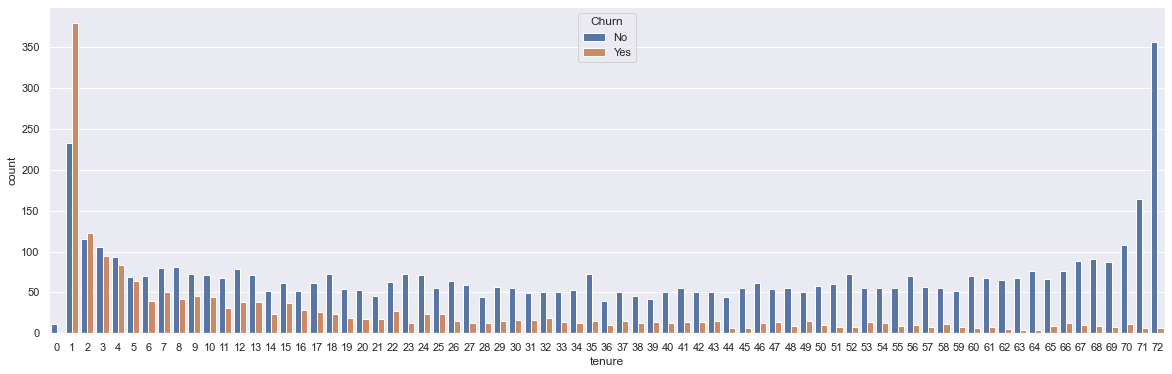

In [50]:
plt.figure(figsize=(20, 6))
sns. set(color_codes=True)
sns.countplot(x='tenure',hue='Churn',data= df )

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

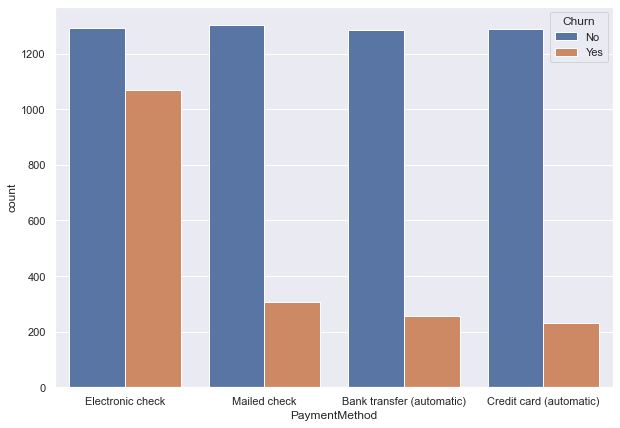

In [25]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='PaymentMethod',hue='Churn',data= df )

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

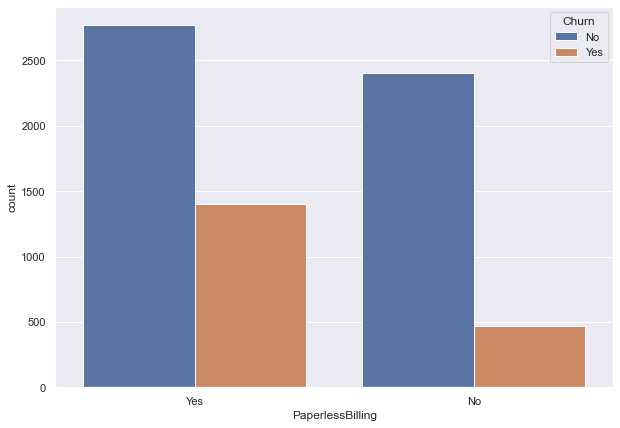

In [26]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='PaperlessBilling',hue='Churn',data= df )

<AxesSubplot:xlabel='Contract', ylabel='count'>

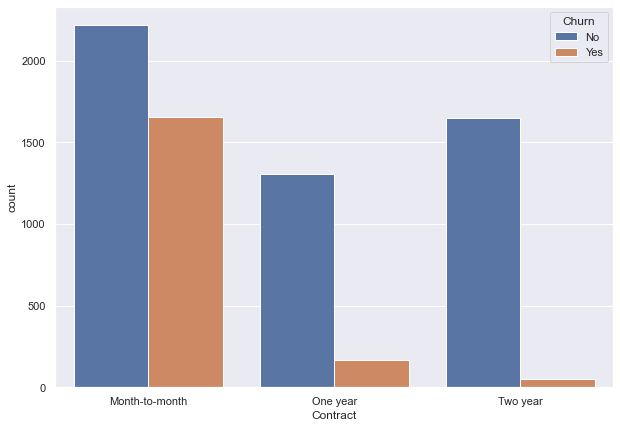

In [27]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='Contract',hue='Churn',data= df )

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

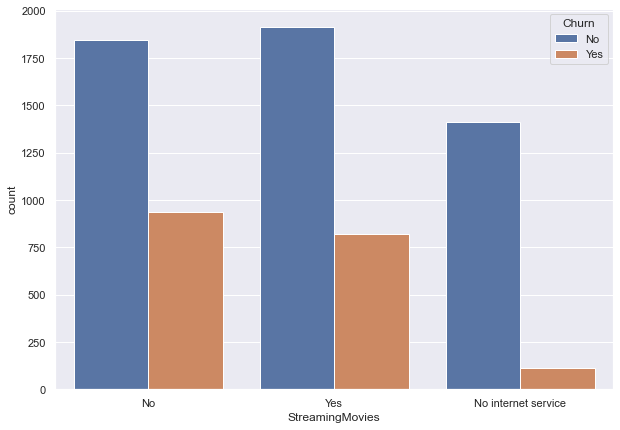

In [28]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='StreamingMovies',hue='Churn',data= df )

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

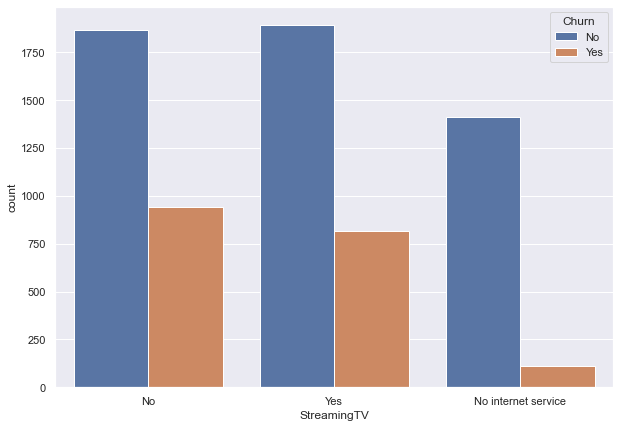

In [29]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='StreamingTV',hue='Churn',data= df )

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

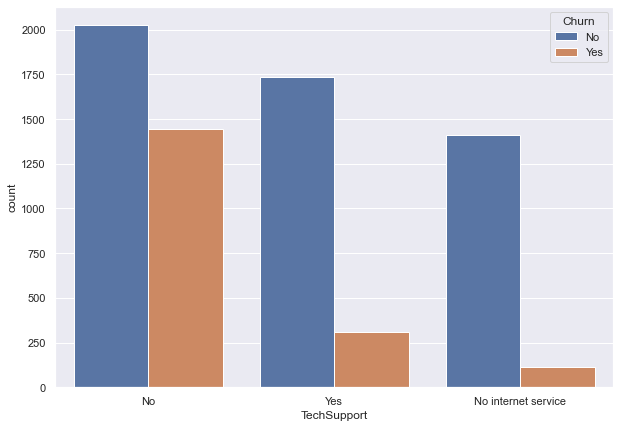

In [30]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='TechSupport',hue='Churn',data= df )

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

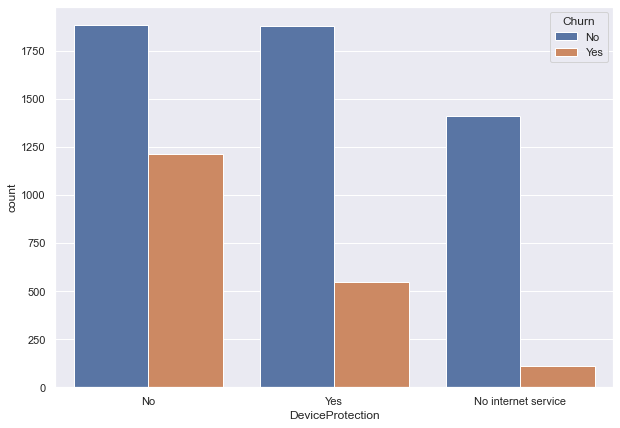

In [31]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='DeviceProtection',hue='Churn',data= df )

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

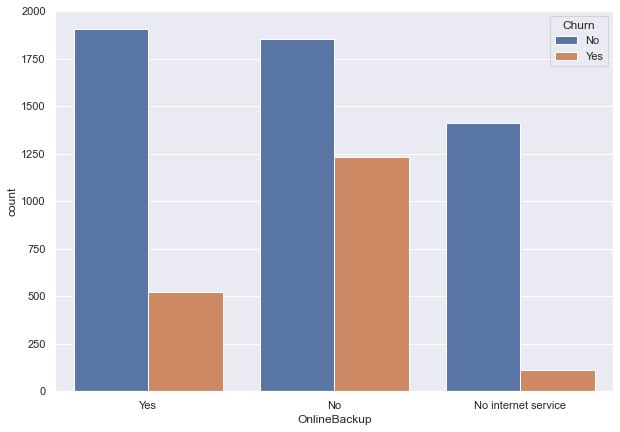

In [32]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='OnlineBackup',hue='Churn',data= df )

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

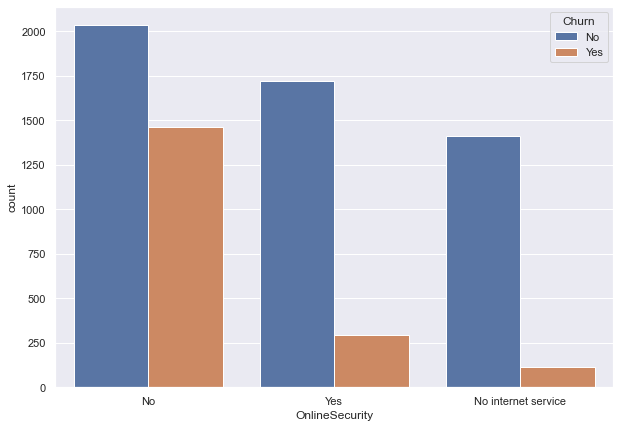

In [33]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='OnlineSecurity',hue='Churn',data= df )

<AxesSubplot:xlabel='InternetService', ylabel='count'>

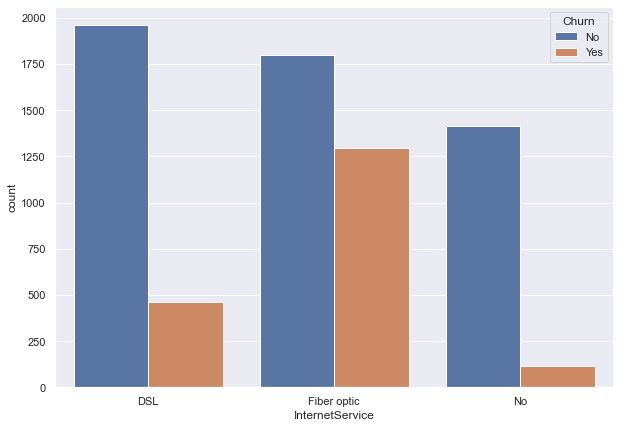

In [34]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='InternetService',hue='Churn',data= df )

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

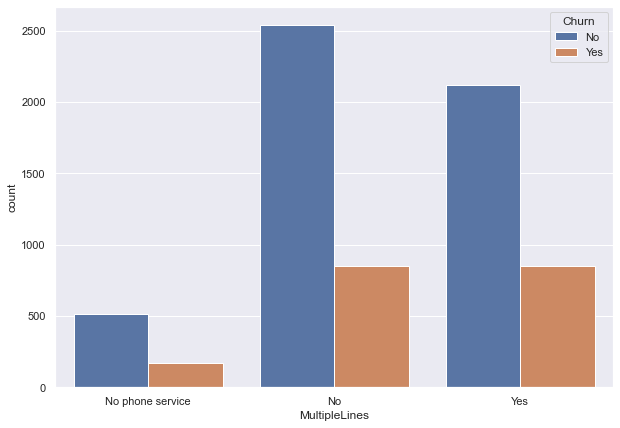

In [35]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='MultipleLines',hue='Churn',data= df )

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

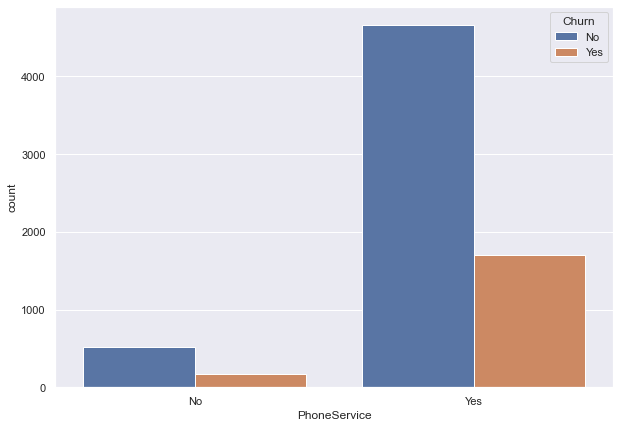

In [36]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='PhoneService',hue='Churn',data= df )

<AxesSubplot:xlabel='Dependents', ylabel='count'>

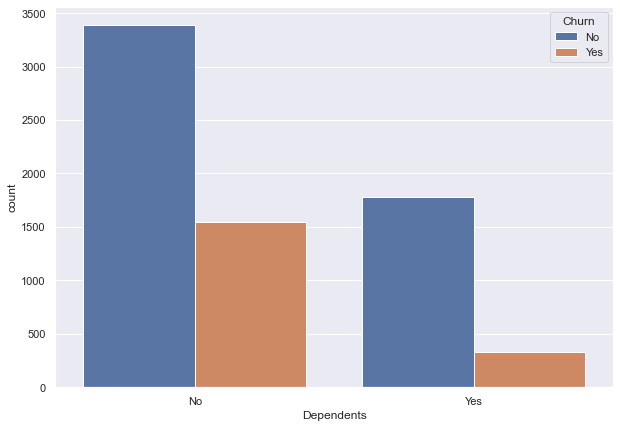

In [37]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='Dependents',hue='Churn',data= df )

<AxesSubplot:xlabel='Partner', ylabel='count'>

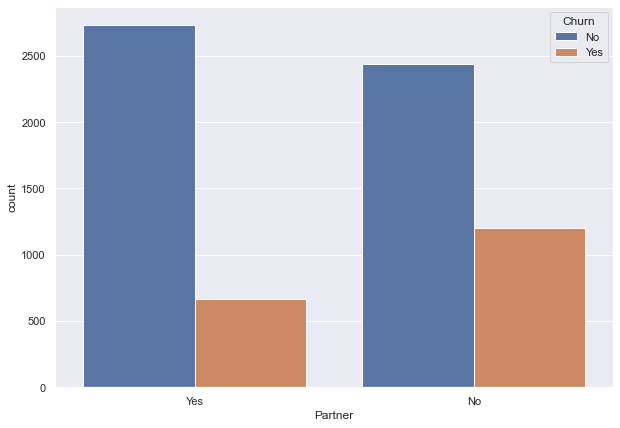

In [38]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='Partner',hue='Churn',data= df )

<AxesSubplot:xlabel='gender', ylabel='count'>

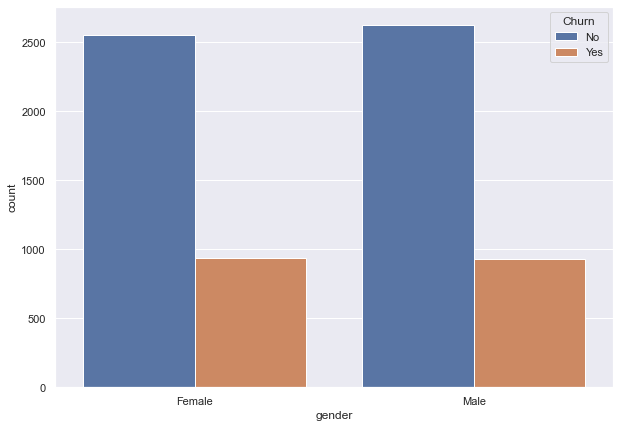

In [39]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='gender',hue='Churn',data= df )

In [51]:
# from above we can conclude the following:-

# Churn rate is very high in those are having Electronic check of payment method and Its almost equal in other PaymentMethods
# those are having PaperlessBilling, Churn rate is high in them
# Churn rate is very high in those on Month to Month contract and getting lower when taking for long time contract
# In service of StreamingMovies we can also notice those are not having, their Churn rate is little high than the those are having the service
# In The servcie of StreamingTV Churn Rate little more for those not having the service of StreamingTV
# We can notice churn is very high where doesn't have TechSupport
# Here we also notice Churn is high where there is no Device Protection
# those are not having Online Security, Churn is very high, Churn is low where having Online Security and no internet service
# Churn is very high in Fiber Optic Internet service, Churn is very low where it doesn't have Internet service
# Churn Percentage is high where having multiple lines. There are some as well, who doesn't have Phone service
# most having PhoneService, few of them not having PhoneService. Churn is also high in having PhoneService
# Churn is high where tenure is less. where tenure is 1 churn very high. churn is high where tenure is 1 to 6. after that where tenure is increasing Churn is decreasing.
# Churn is less in Partner, more in customer those are not partner
# Churn is less in SeniorCitizen, Must be we have less no customer in seniors
# Churn is almost same in all gender, male and female

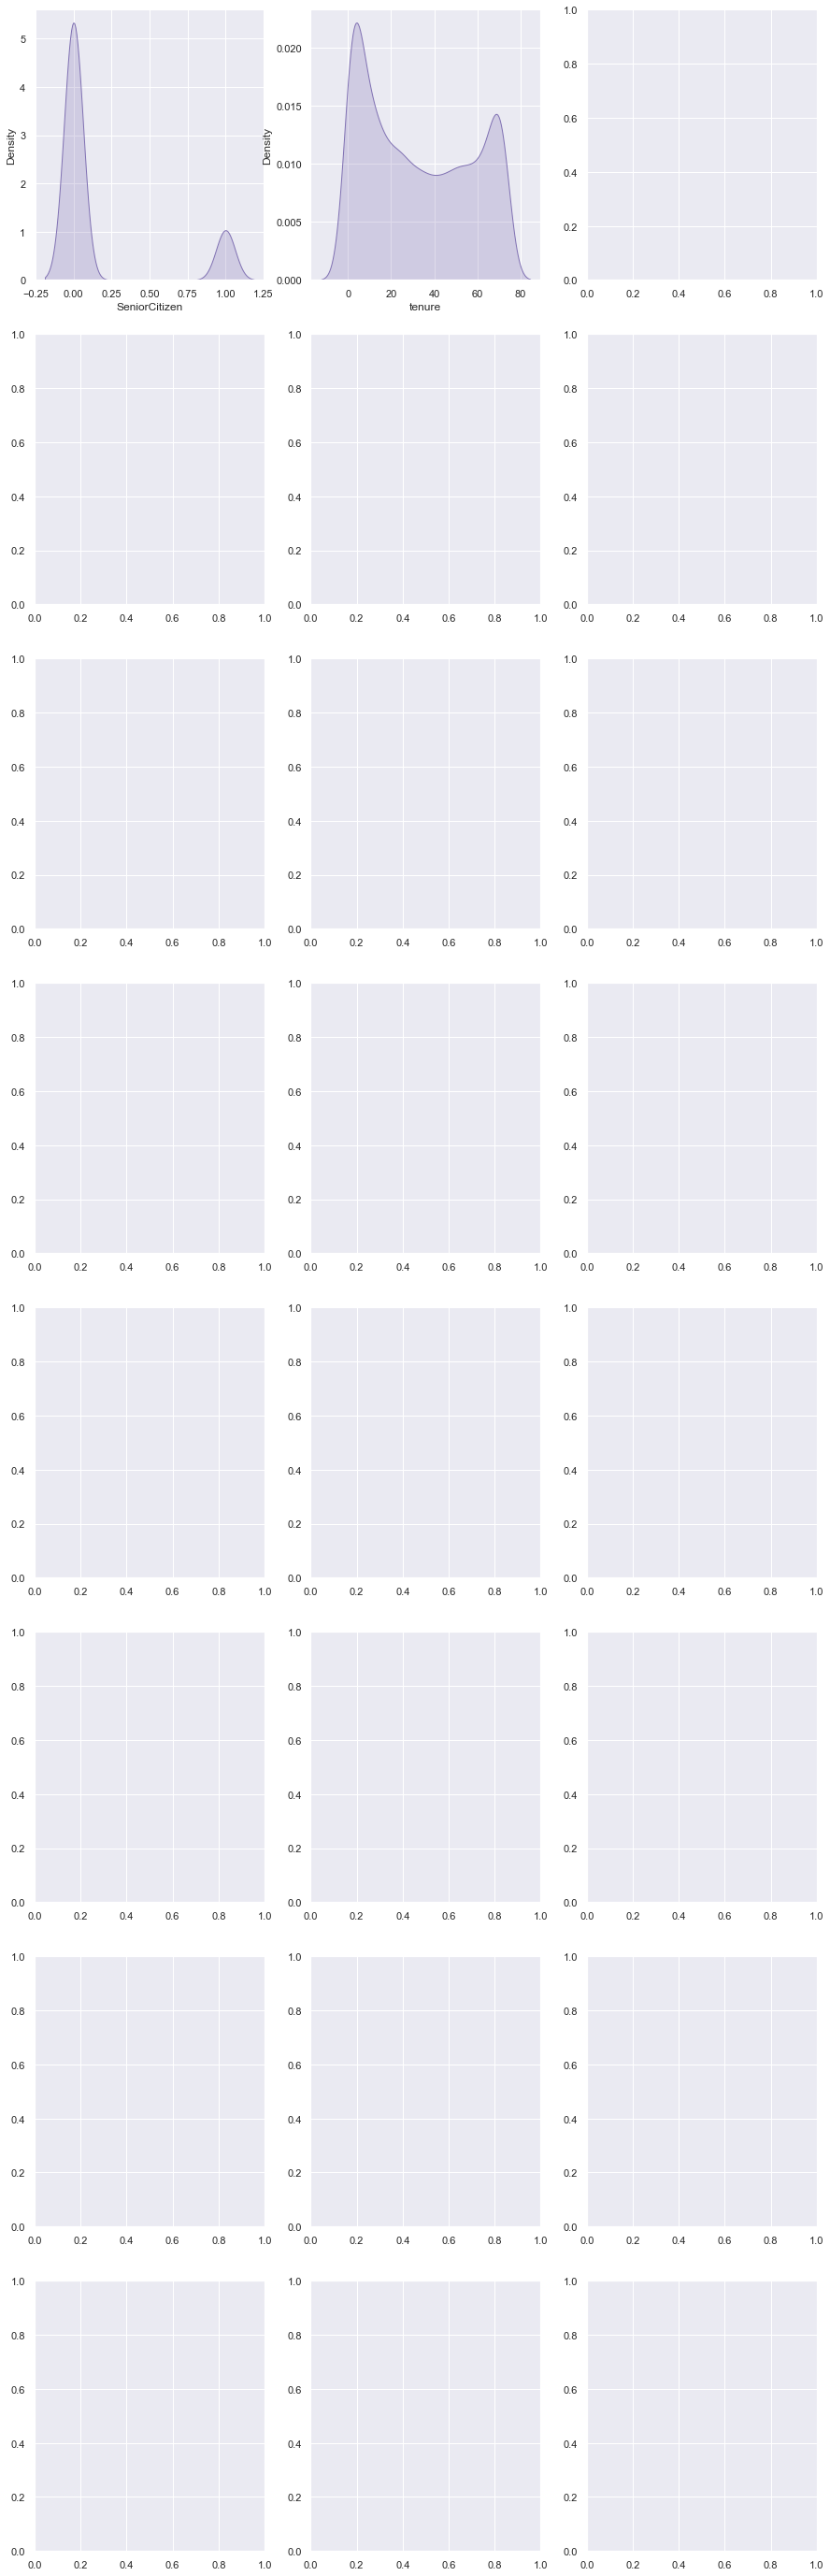

In [54]:
# distplot for integer type features

fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[integer_datatypes].items():
    sns.distplot(value, ax=ax[index], hist=False, color="m", kde_kws={"shade": True})
    index += 1
plt.show()

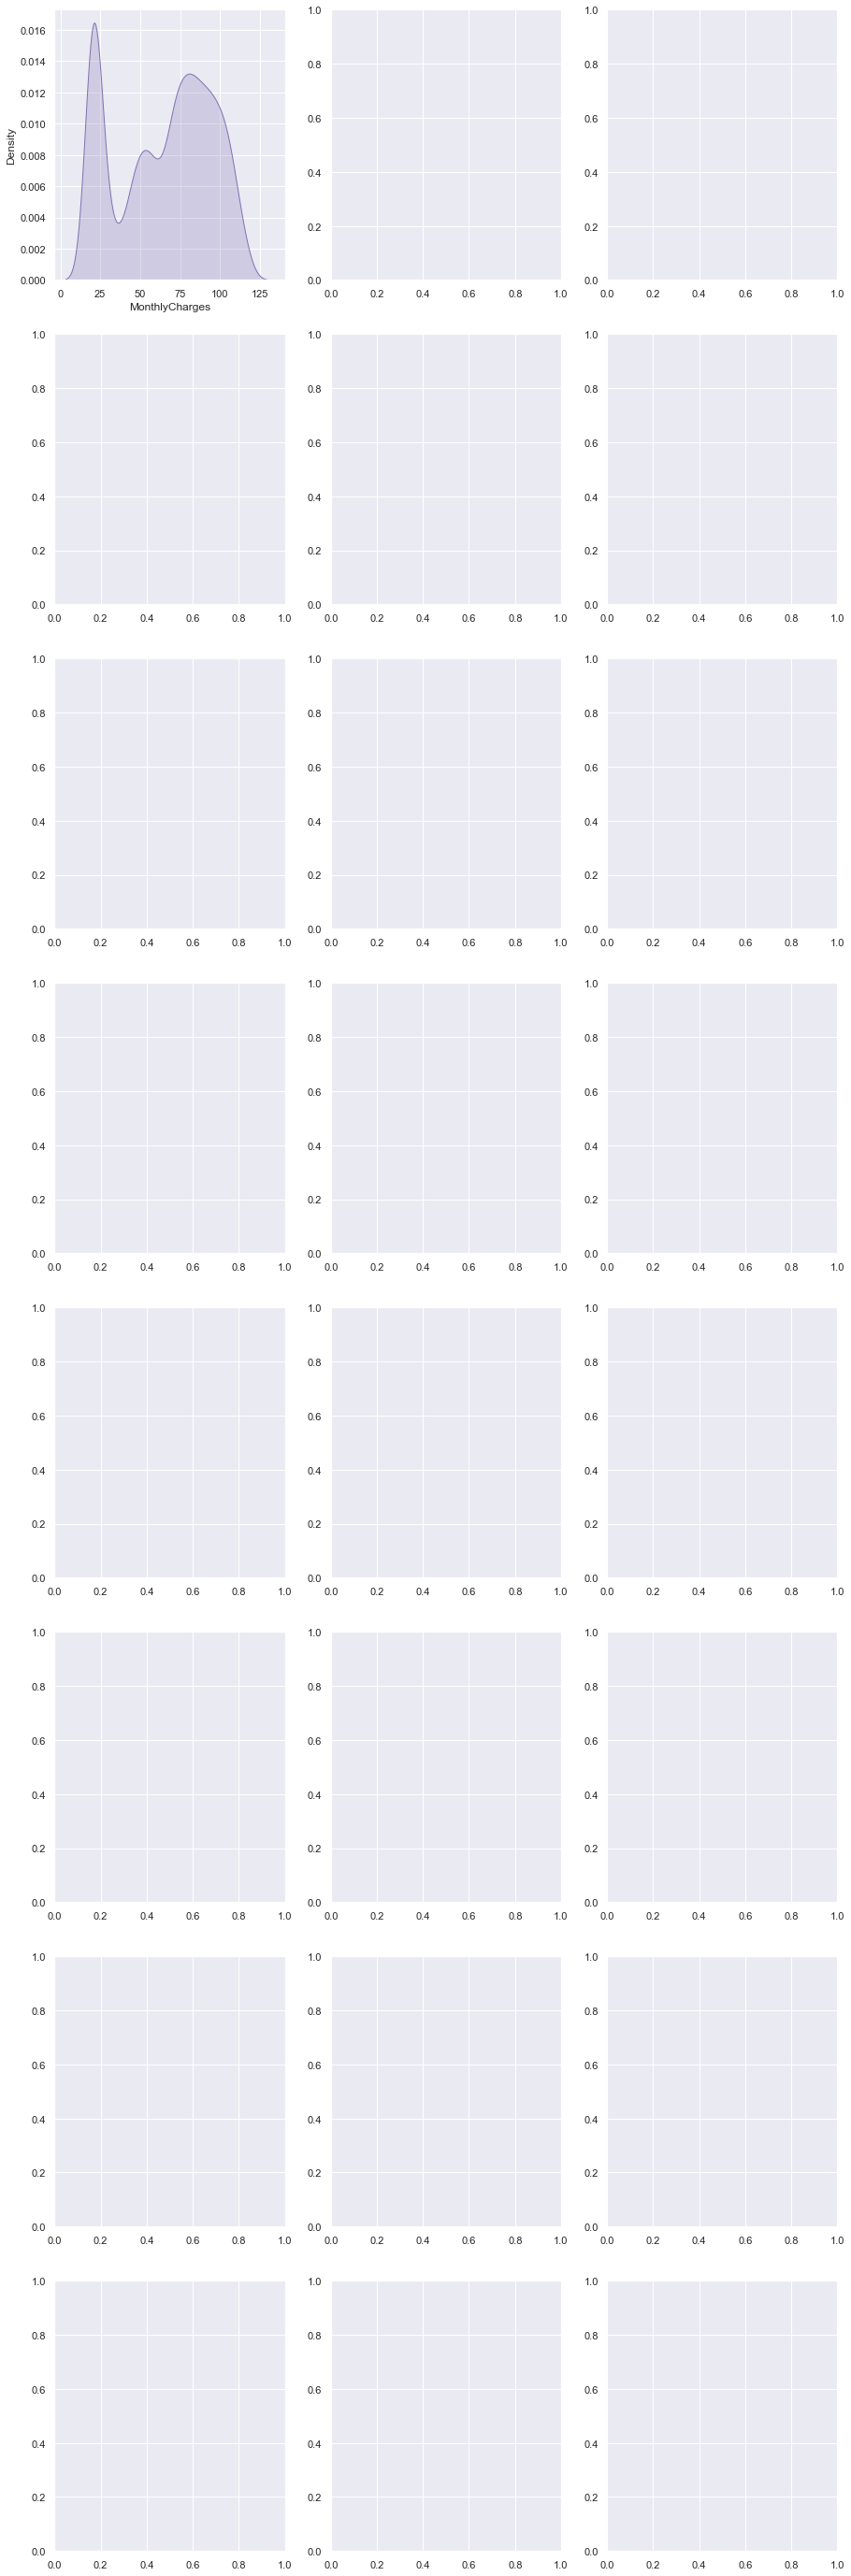

In [55]:
# distplot for float type features

fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[float_datatypes].items():
    sns.distplot(value, ax=ax[index], hist=False, color="m", kde_kws={"shade": True})
    index += 1
plt.show()

In [59]:
# from the above it is clear that there are some skewnesses in some of the graphs and they have to be rectified!

In [60]:
# to check the outliers let's check the boxplots first...

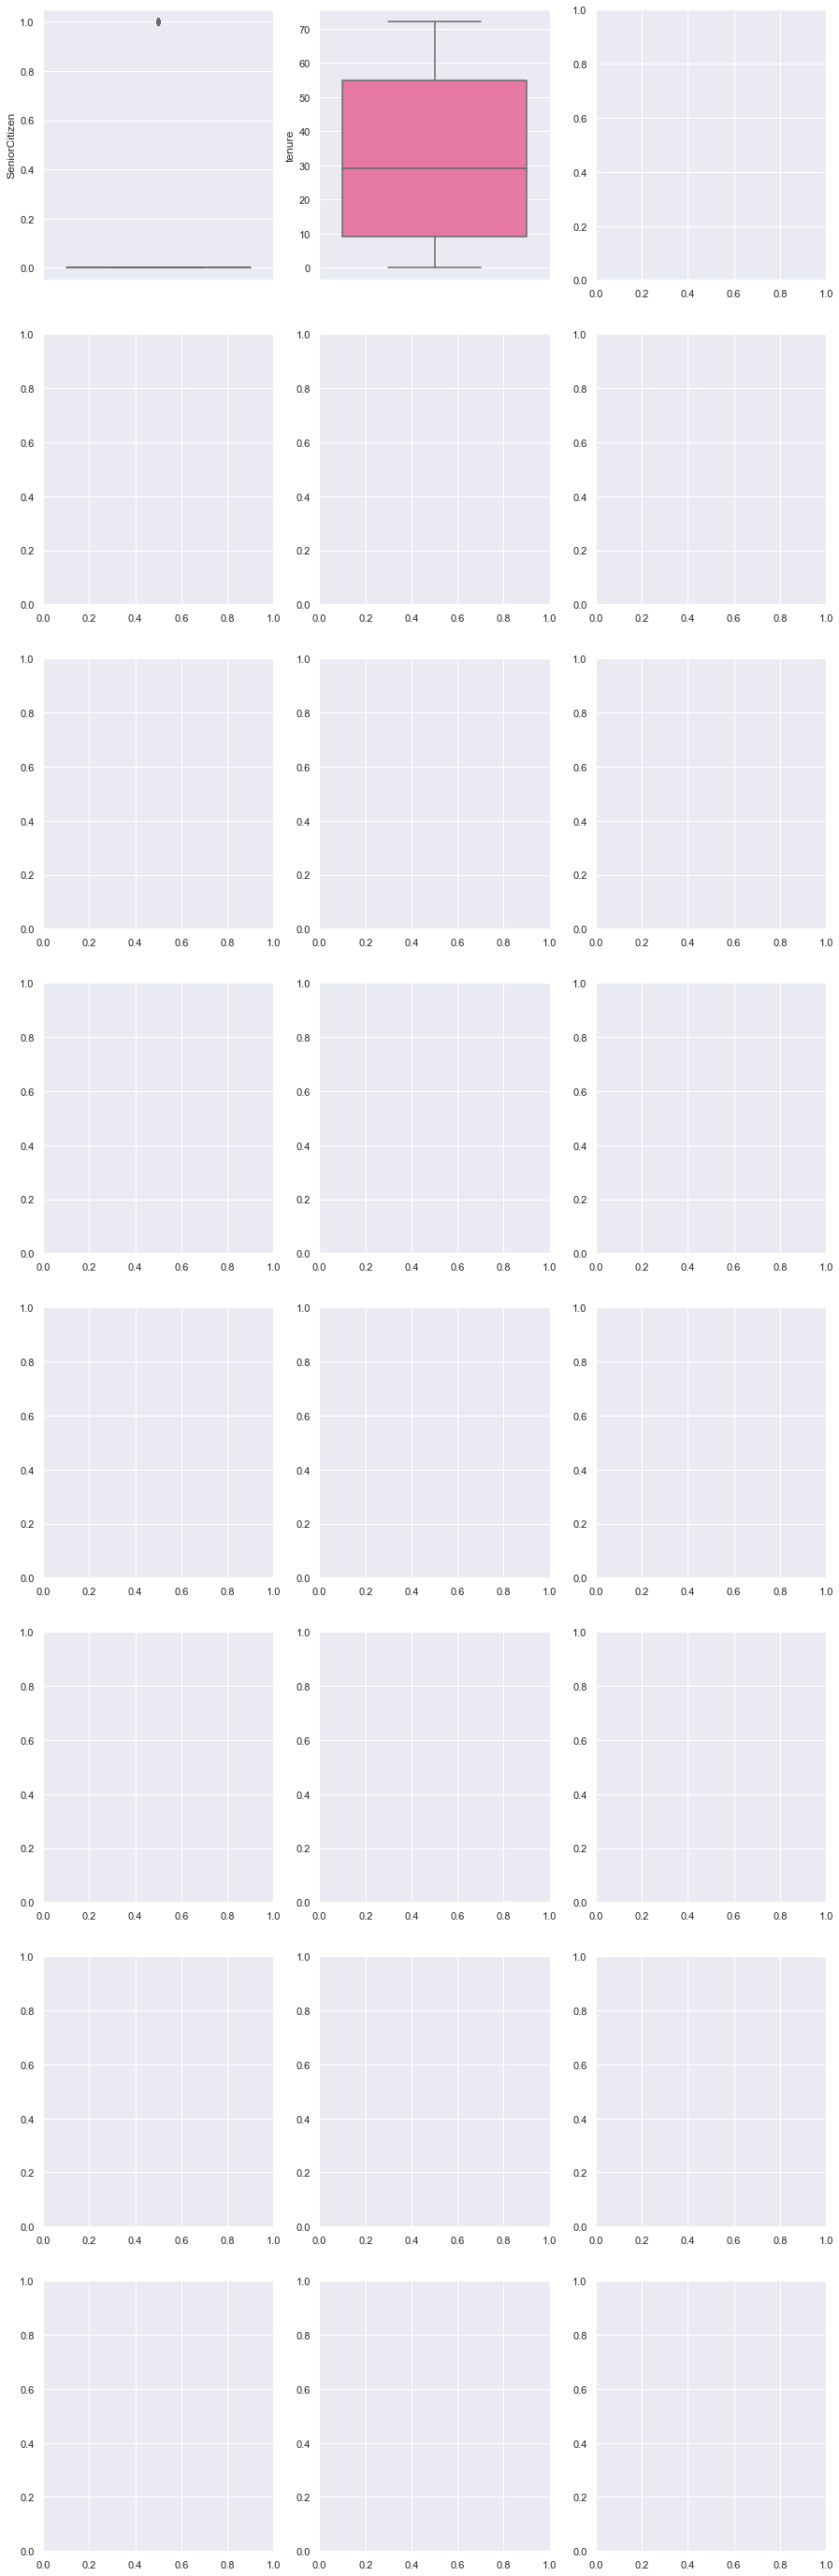

In [57]:
# Boxplot for the integer values 

fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[integer_datatypes].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="RdPu")
    index += 1
plt.show()

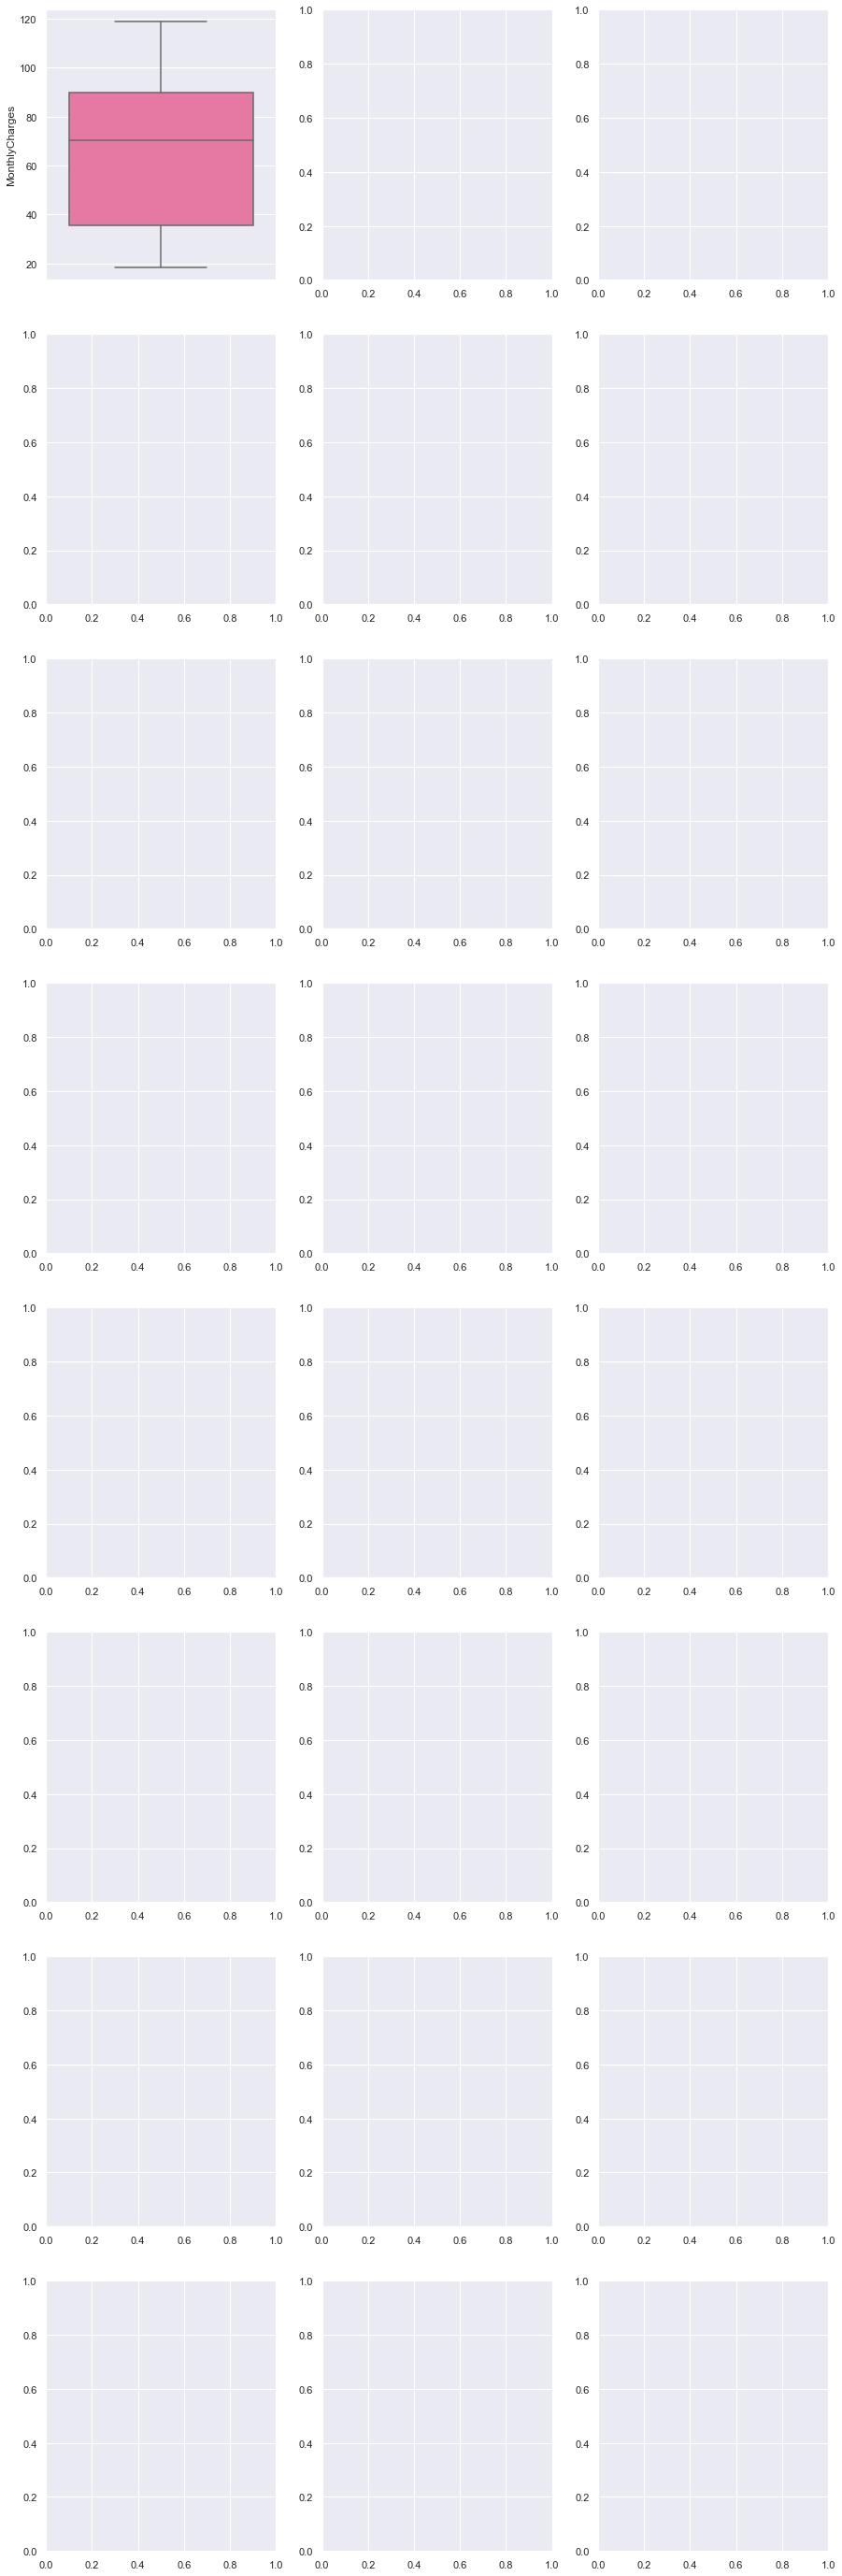

In [58]:
# Boxplot for the float values 

fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[float_datatypes].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="RdPu")
    index += 1
plt.show()

In [61]:
# there are no outliers as such except one feature

In [62]:
# Encoding the object datatype columns

In [65]:
# object data types:

object_datatypes=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='O':
        object_datatypes.append(x)
object_datatypes

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [66]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Churn']=le.fit_transform(df['Churn'])

df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

In [67]:
# target column was object datatype so it is converted into integer type.

In [68]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,1


In [69]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int32
dtype: object

In [70]:
# let us now convert the remaining feature columns which are also object data type

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
object_data = df.select_dtypes(exclude=['int64', 'float','int32'])
for val in object_data:
    df[val]=le.fit_transform(df[val].astype(str))

In [71]:
df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges          int32
Churn                 int32
dtype: object

In [72]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


In [73]:
# we have successfully changed all the object type data into int or float type ones!

In [74]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [75]:
columns= ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn']

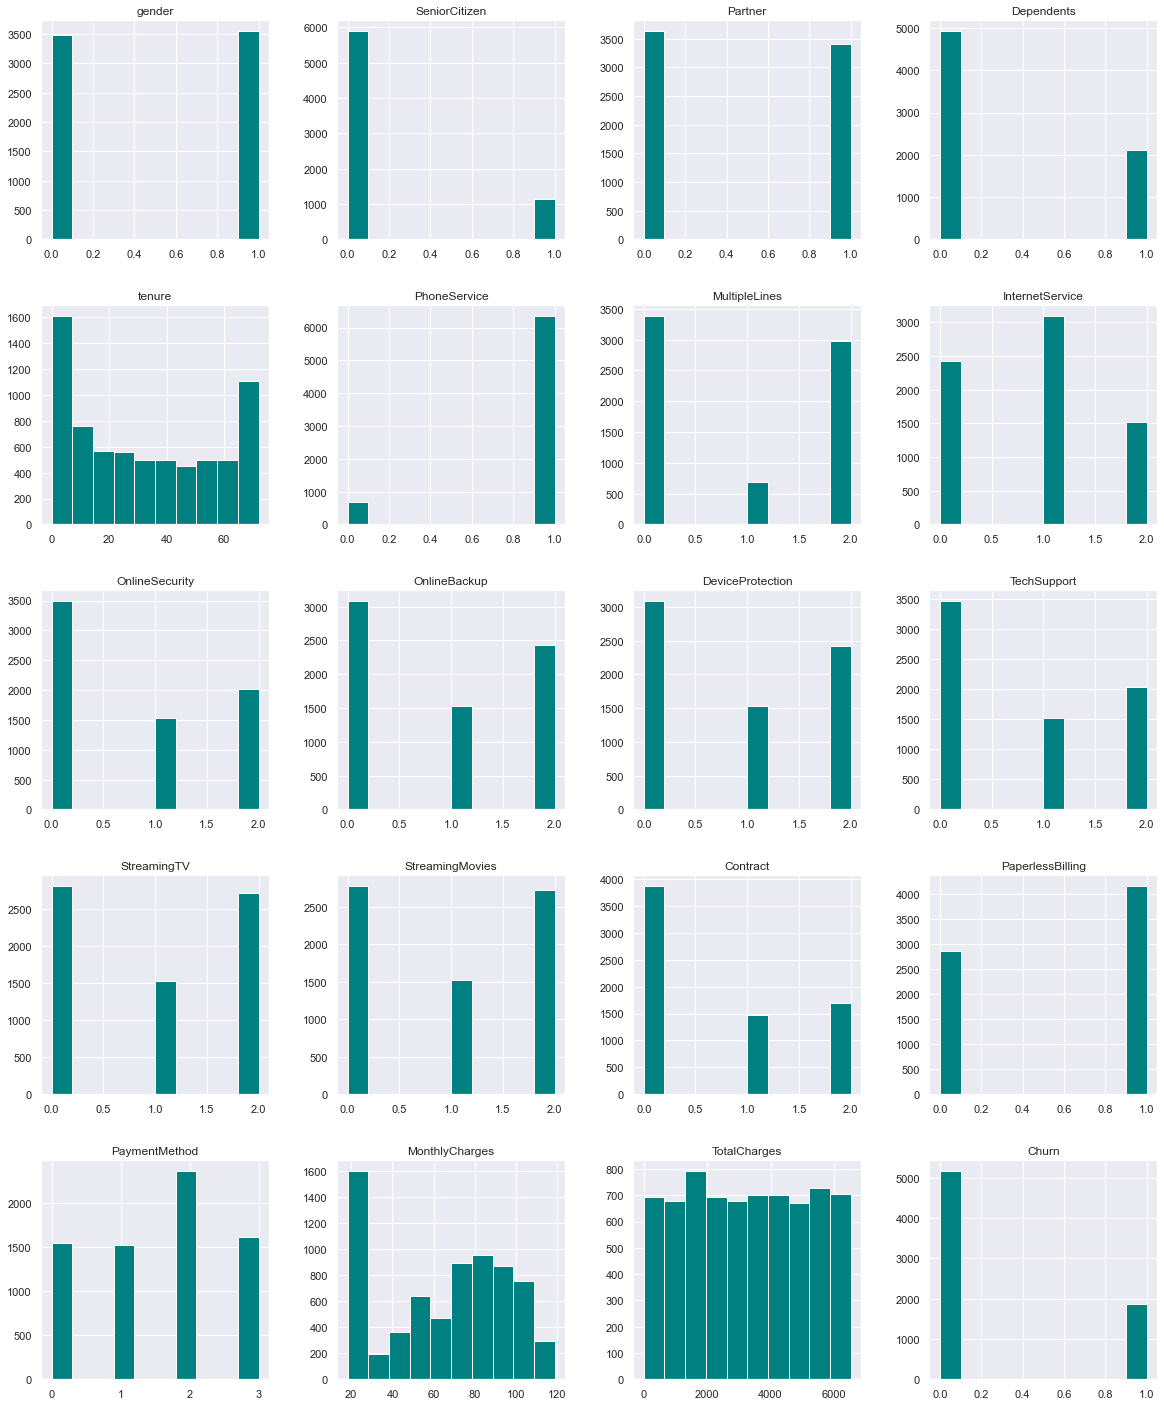

In [76]:
df.hist(figsize=(20,25), color= 'teal')
plt.show()

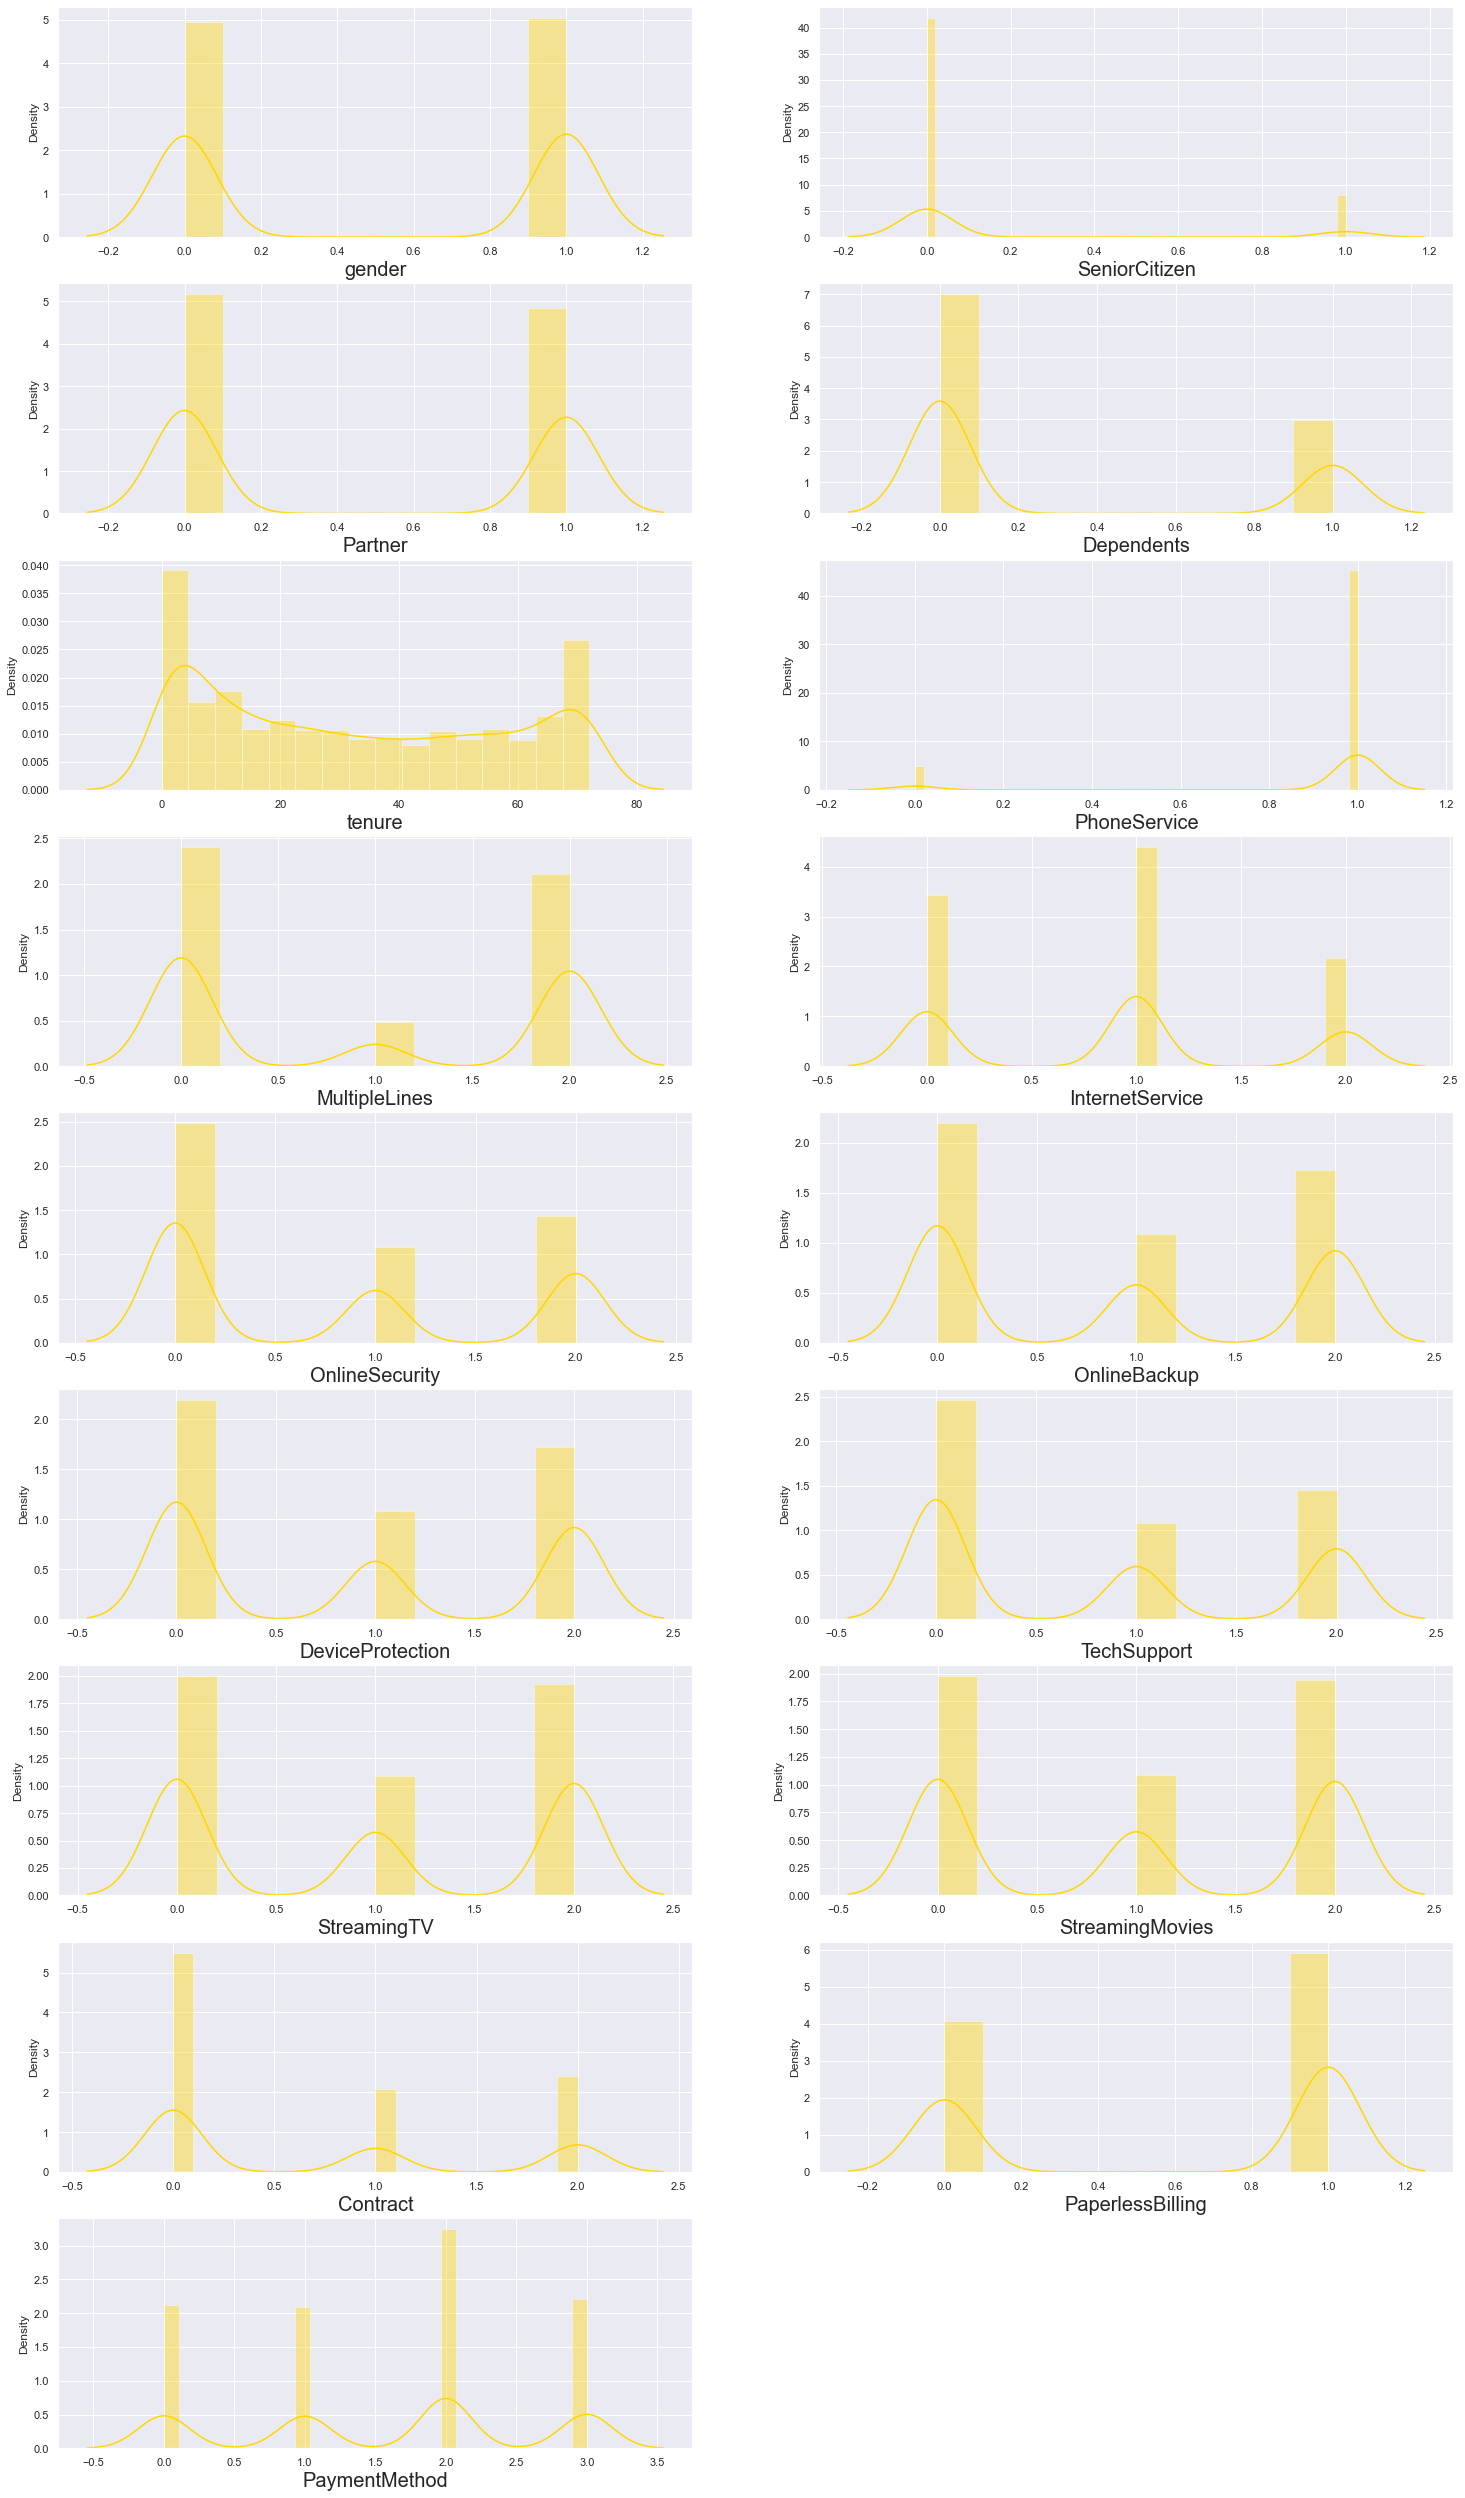

In [77]:
#Univariate Analysis

plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=17:
        ax = plt.subplot(10,2,plotnumber)
        sns.distplot(df[column], color = 'gold')
        plt.xlabel(column,fontsize=20)
        
    plotnumber +=1
plt.show()

In [78]:
# mostly normally distributed, but few has bit skewness!

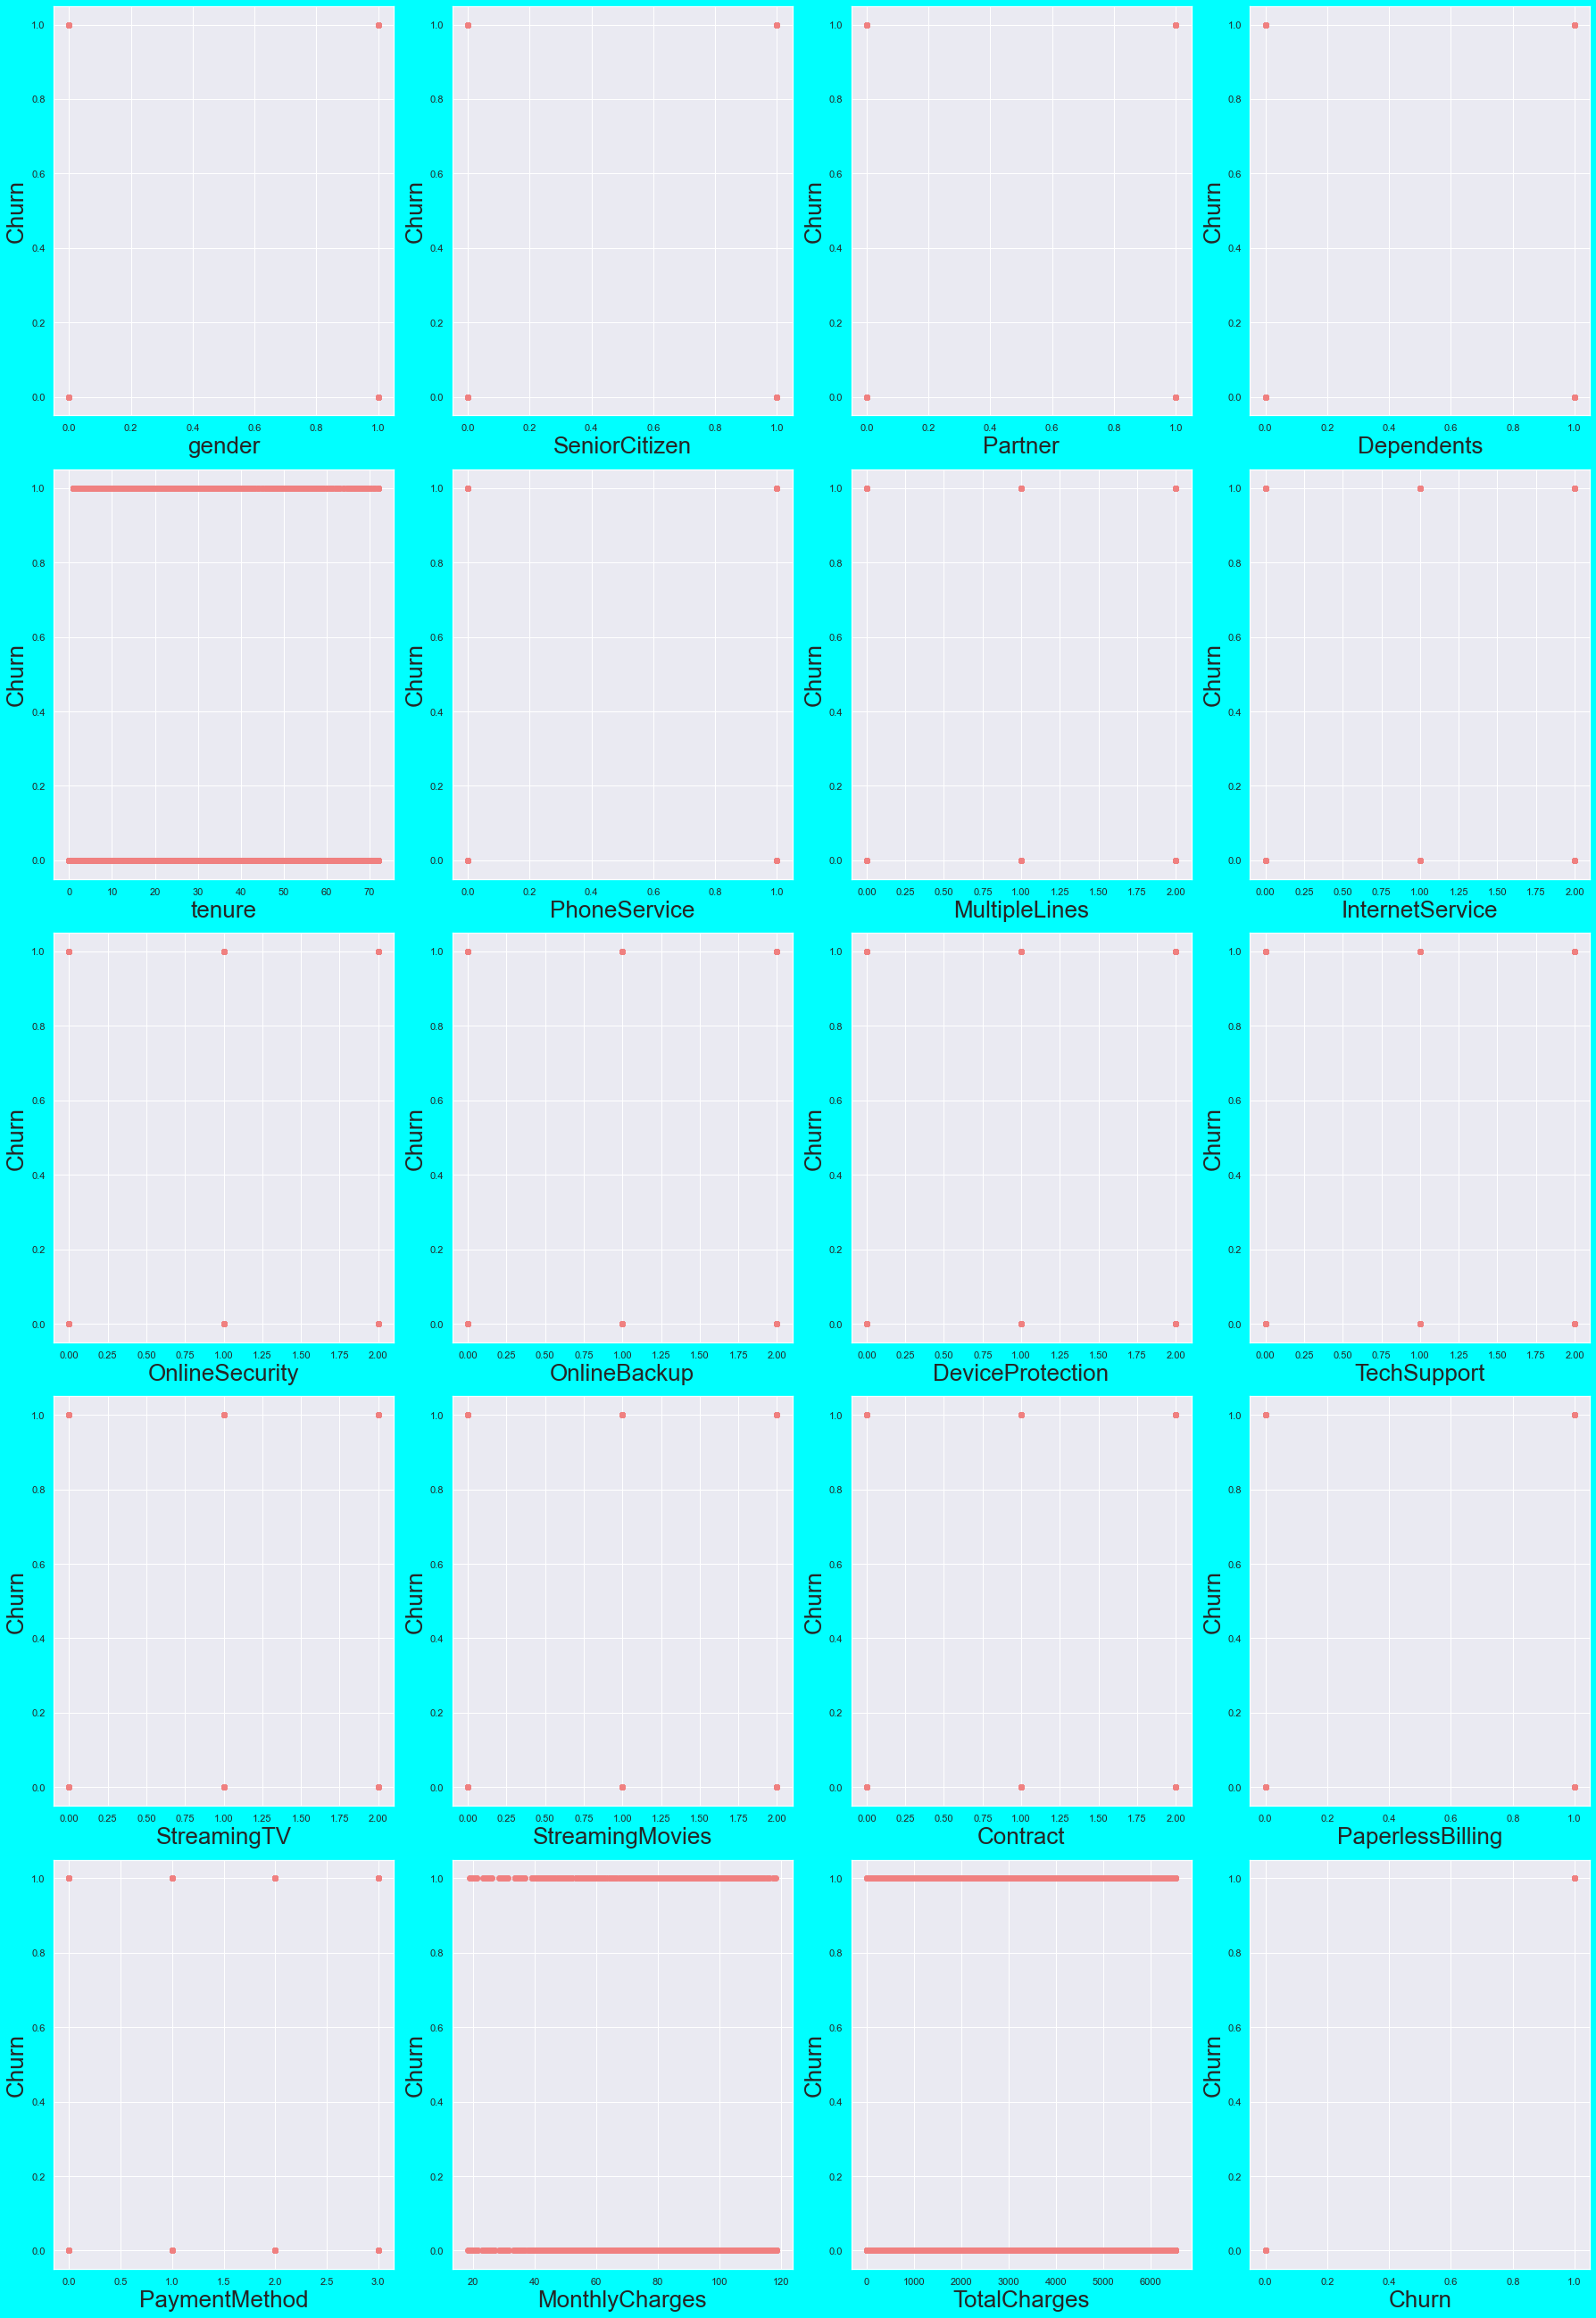

In [81]:
#Bivariate Analysis

plt.figure(figsize = (25,50), facecolor = 'cyan')
plotnumber = 1

for column in df:
    if plotnumber <=20:
        ax = plt.subplot(7,4,plotnumber)
        plt.scatter(df[column],df['Churn'], color='lightcoral')
        plt.xlabel(column,fontsize=26)
        plt.ylabel('Churn', fontsize=26)
    plotnumber += 1
plt.tight_layout()

In [82]:
# not very clear conclusion can be drawn from above

<Figure size 1800x1440 with 0 Axes>

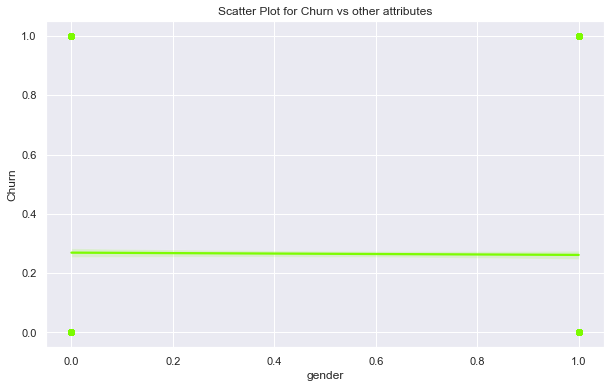

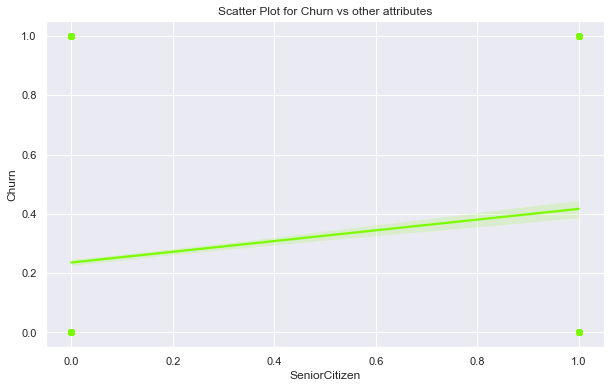

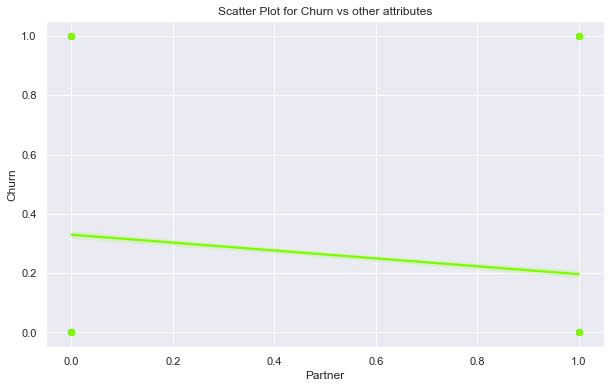

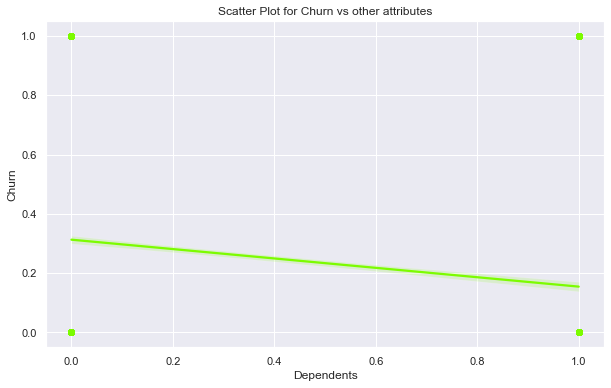

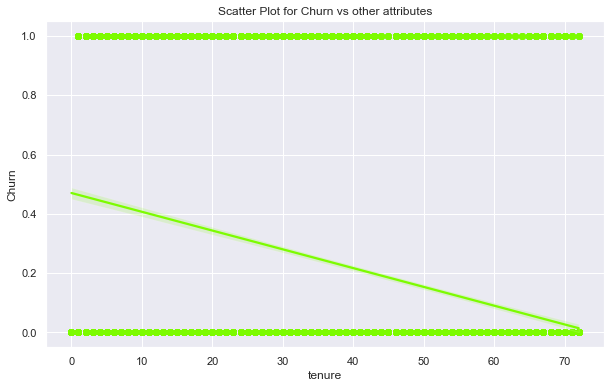

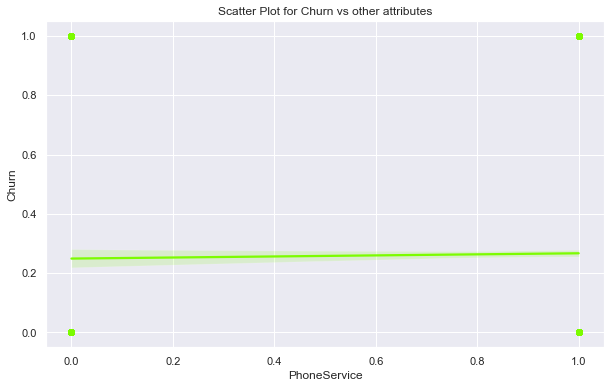

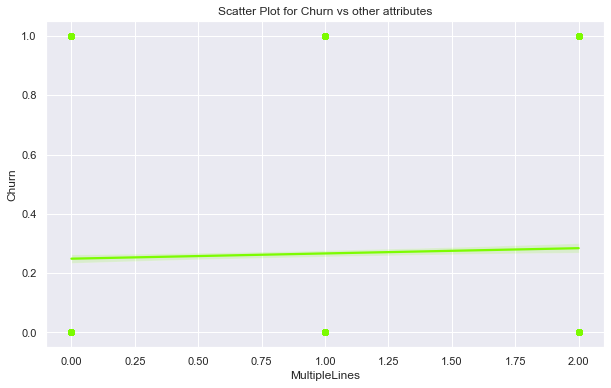

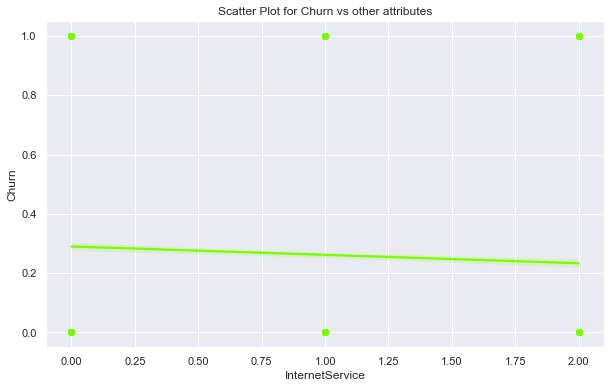

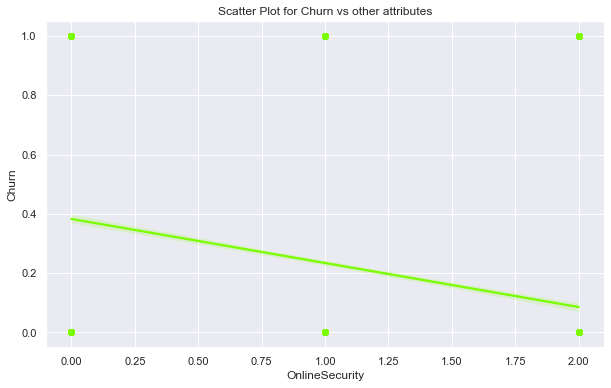

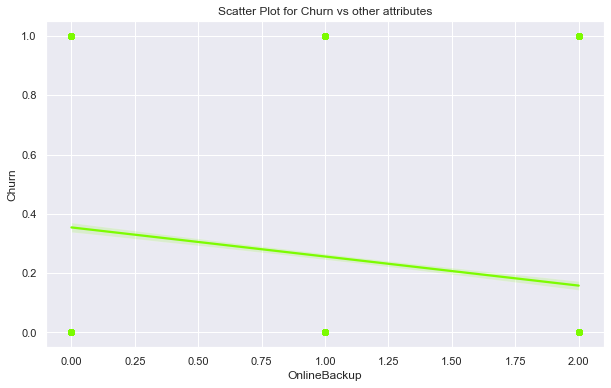

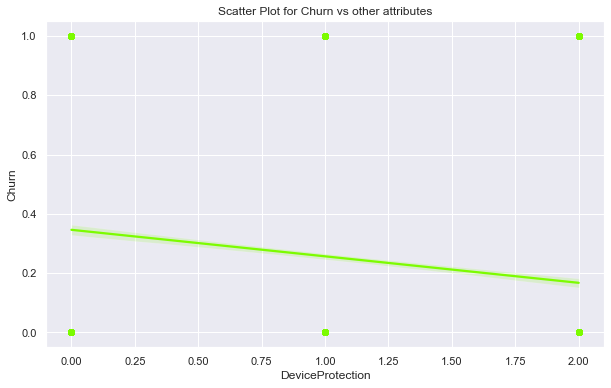

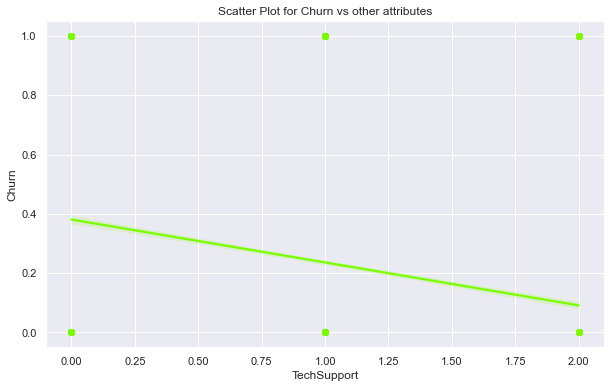

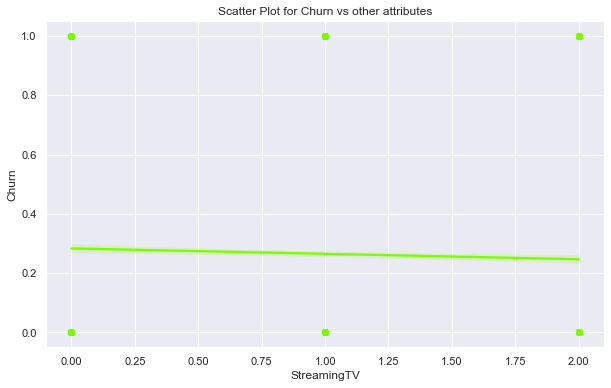

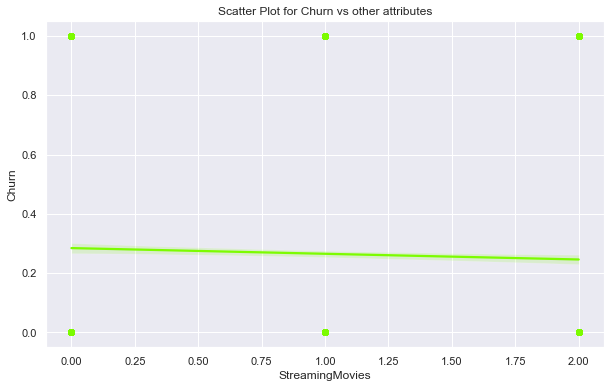

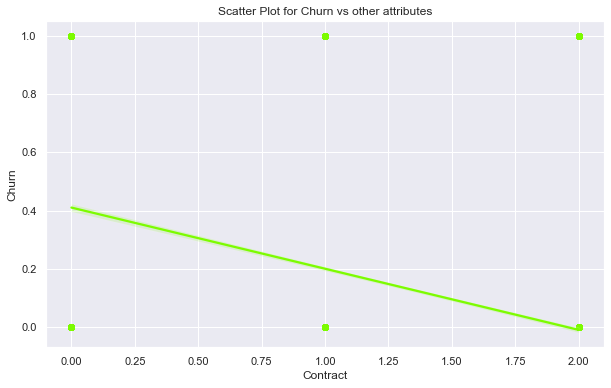

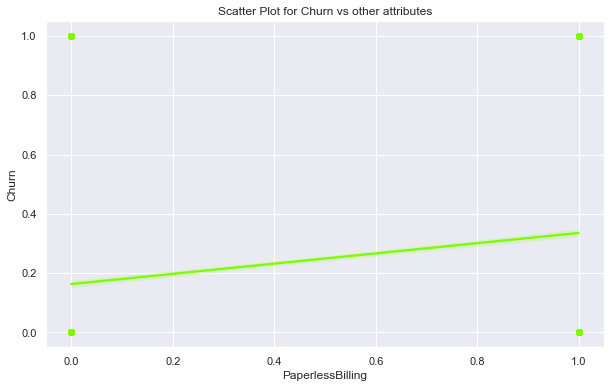

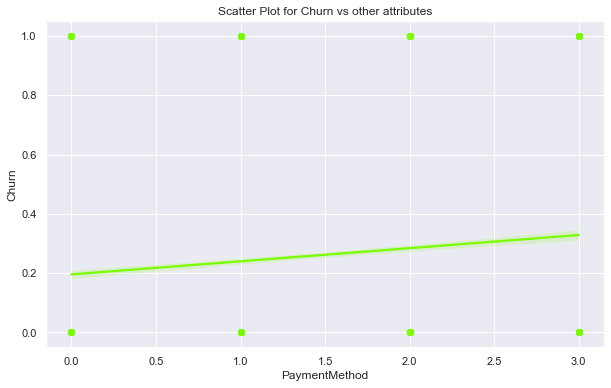

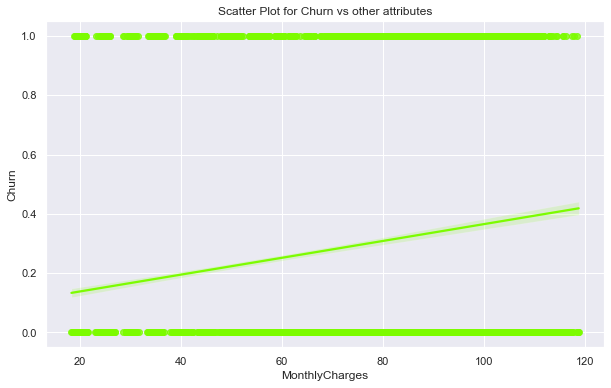

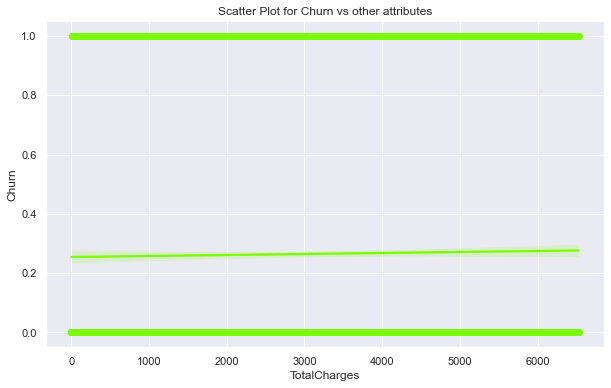

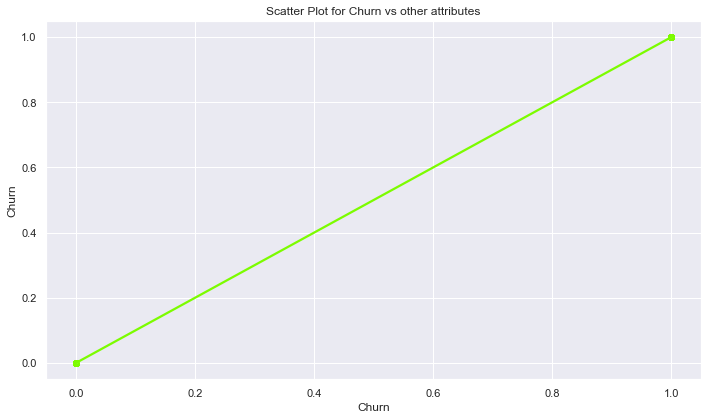

In [83]:
# Correlation analysis with scatterplot

plt.figure(figsize = (25,20), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=20:
        plt.figure(figsize = (10,6))
        sns.regplot(df[column], df['Churn'], color= 'lawngreen')
        plt.title('Scatter Plot for Churn vs other attributes')
        plt.xlabel(column)
        plt.ylabel('Churn')
        
plt.tight_layout()

In [84]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.090756,-0.195525


<AxesSubplot:>

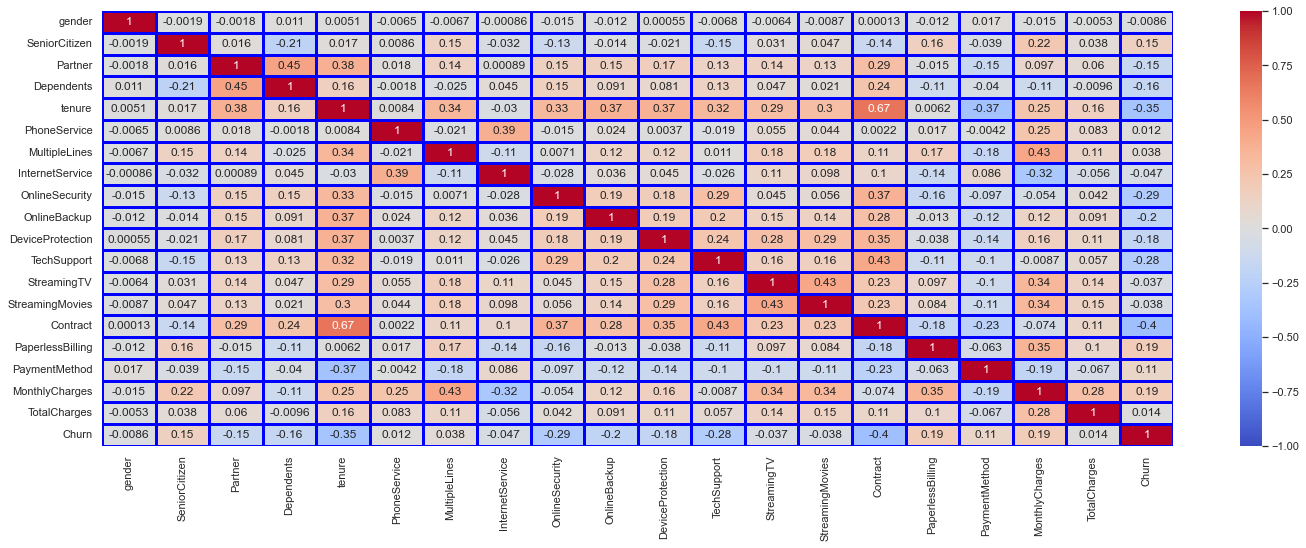

In [85]:
#let us make a heatmap

import matplotlib.pyplot as plt
plt.figure(figsize=(24,8))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='blue')

In [86]:
# let us now check for the skewness
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.015857
Churn               1.063031
dtype: float64

In [87]:
# skewness is present!

In [88]:
# let us work for the outliers

In [89]:
# Using Z Score to remove outliers

from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold= 3
np.where(z>3)

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
         114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
         215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
         278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
         387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
         544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
         677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
         829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
         934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
        1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
        1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
        1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
        1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
        1614, 1620, 1634, 1637, 1652, 

In [90]:
df= df[(z<3).all(axis=1)]
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,6104,1
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1550,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0,0,0,0,72,1,0,2,1,1,1,1,1,1,2,1,0,21.15,770,0
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


In [91]:
# now again check the boxplot

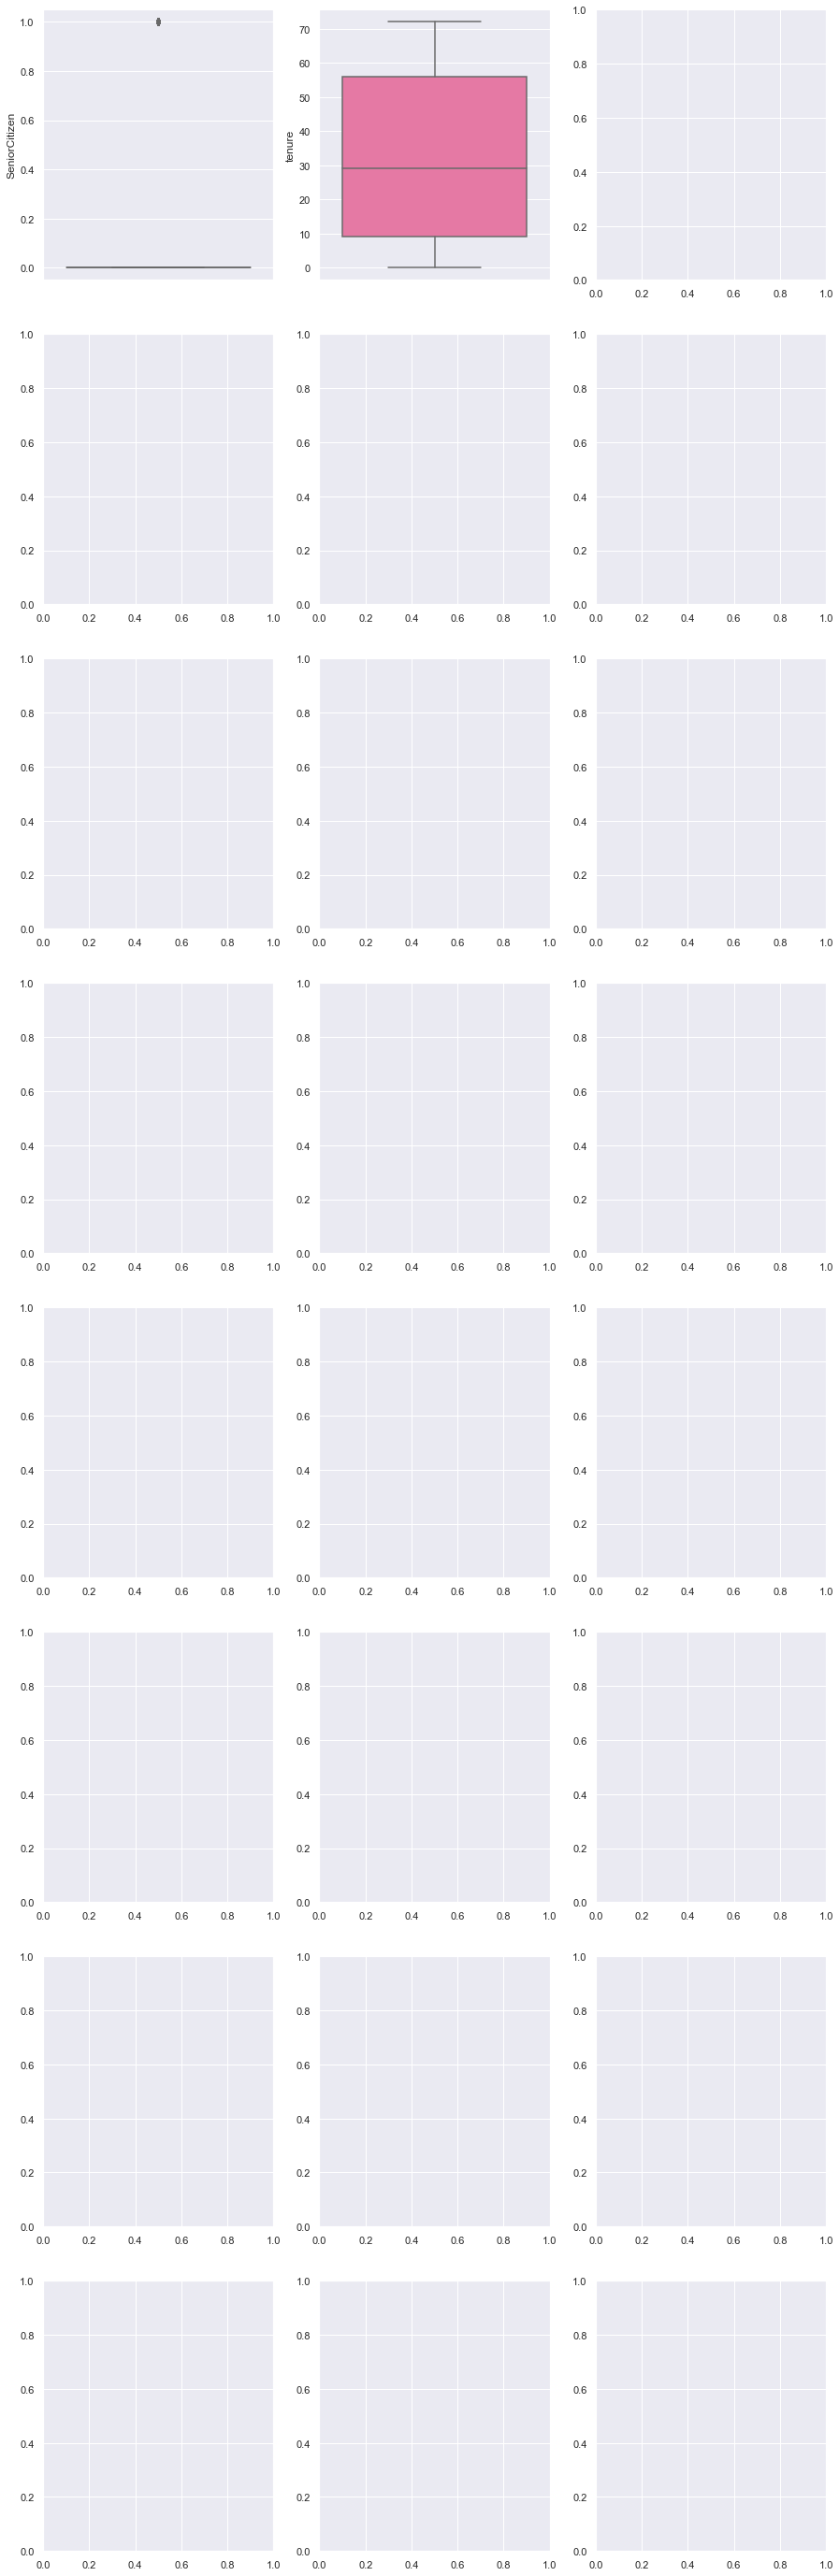

In [92]:
# Boxplot

fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[integer_datatypes].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="RdPu")
    index += 1
plt.show()

In [93]:
df.skew()

gender             -0.014781
SeniorCitizen       1.823376
Partner             0.056316
Dependents          0.876594
tenure              0.237945
PhoneService        0.000000
MultipleLines       0.132058
InternetService     0.049126
OnlineSecurity      0.422032
OnlineBackup        0.167910
DeviceProtection    0.183254
TechSupport         0.409833
StreamingTV        -0.002734
StreamingMovies    -0.010025
Contract            0.629701
PaperlessBilling   -0.386613
PaymentMethod      -0.169889
MonthlyCharges     -0.399139
TotalCharges       -0.041683
Churn               1.053055
dtype: float64

In [95]:
# We now don't see any skewness in numerical columns and 'churn' column, so it is okay to proceed further...

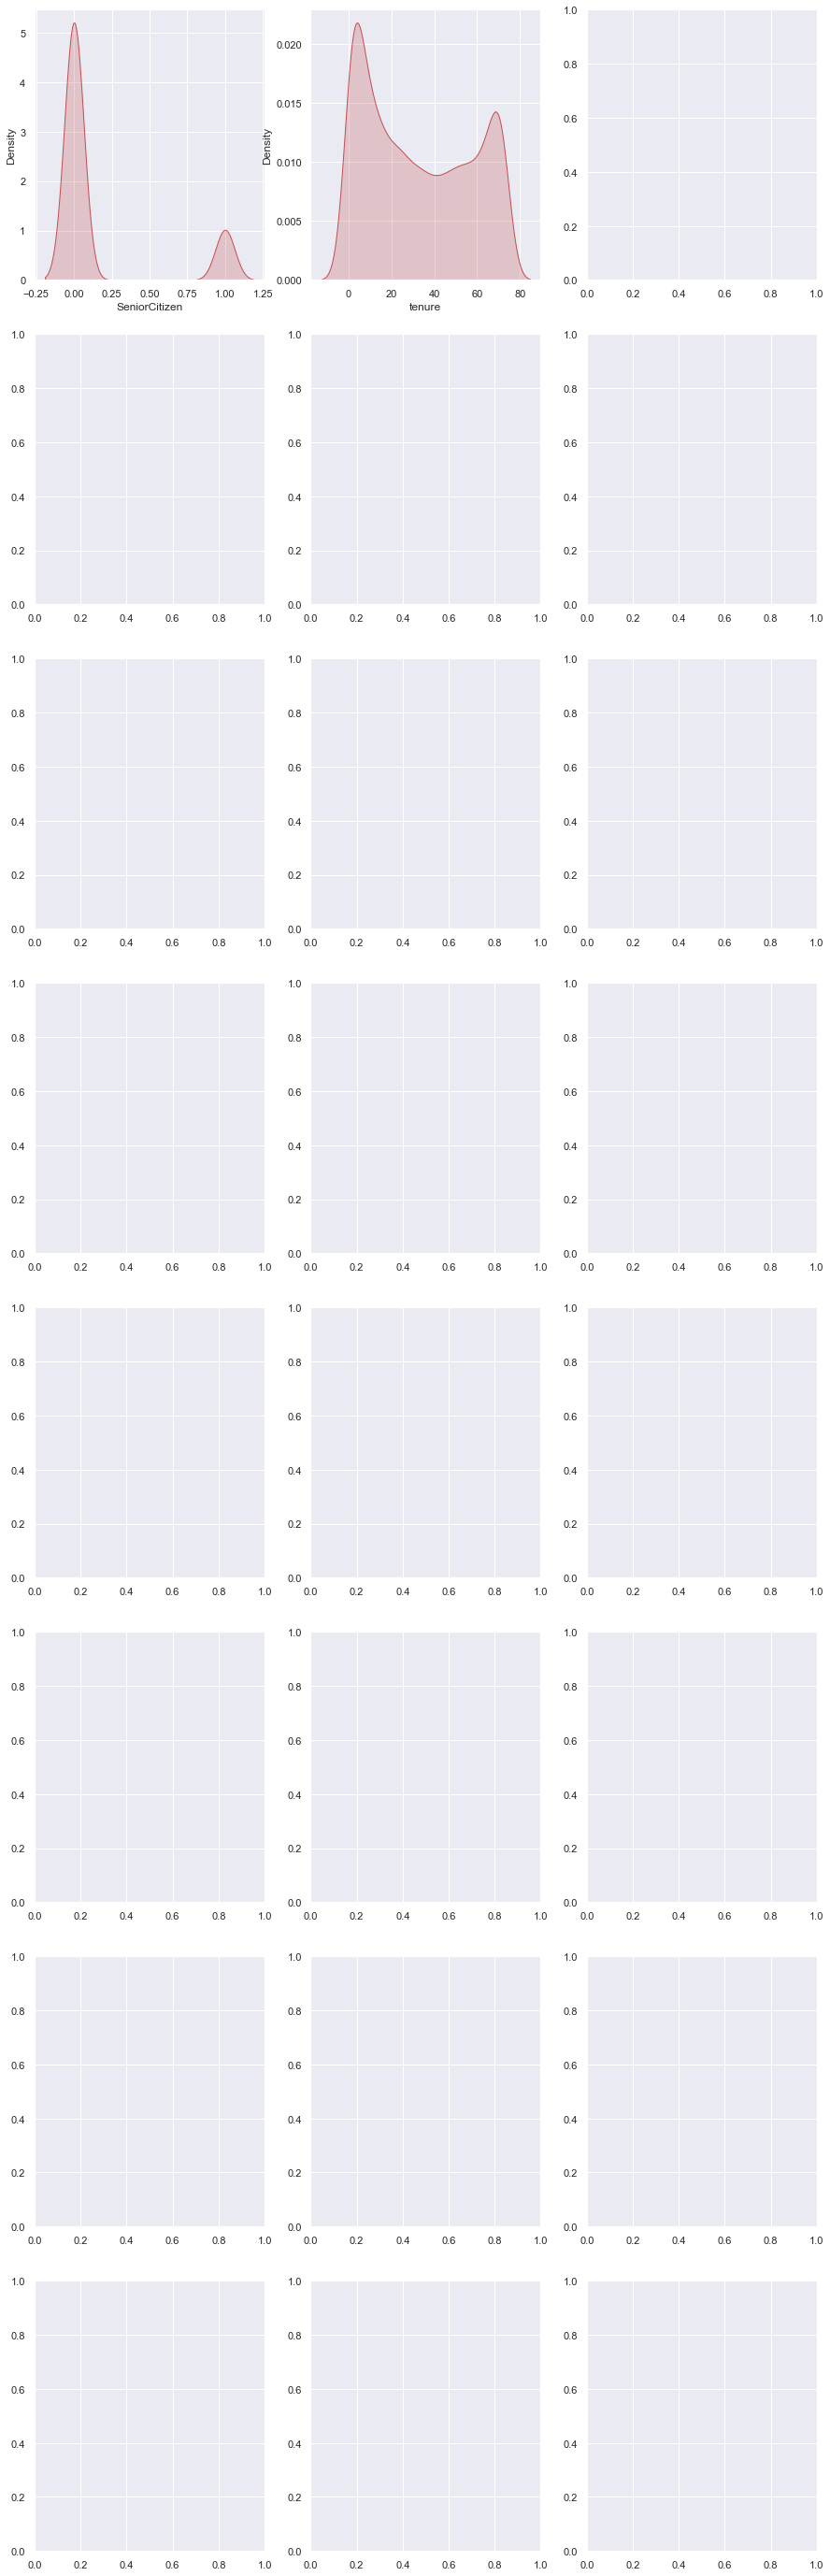

In [96]:
# visualize the skewness

fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[integer_datatypes].items():
    sns.distplot(value, ax=ax[index], hist=False, color="r", kde_kws={"shade": True})
    index += 1
plt.show()

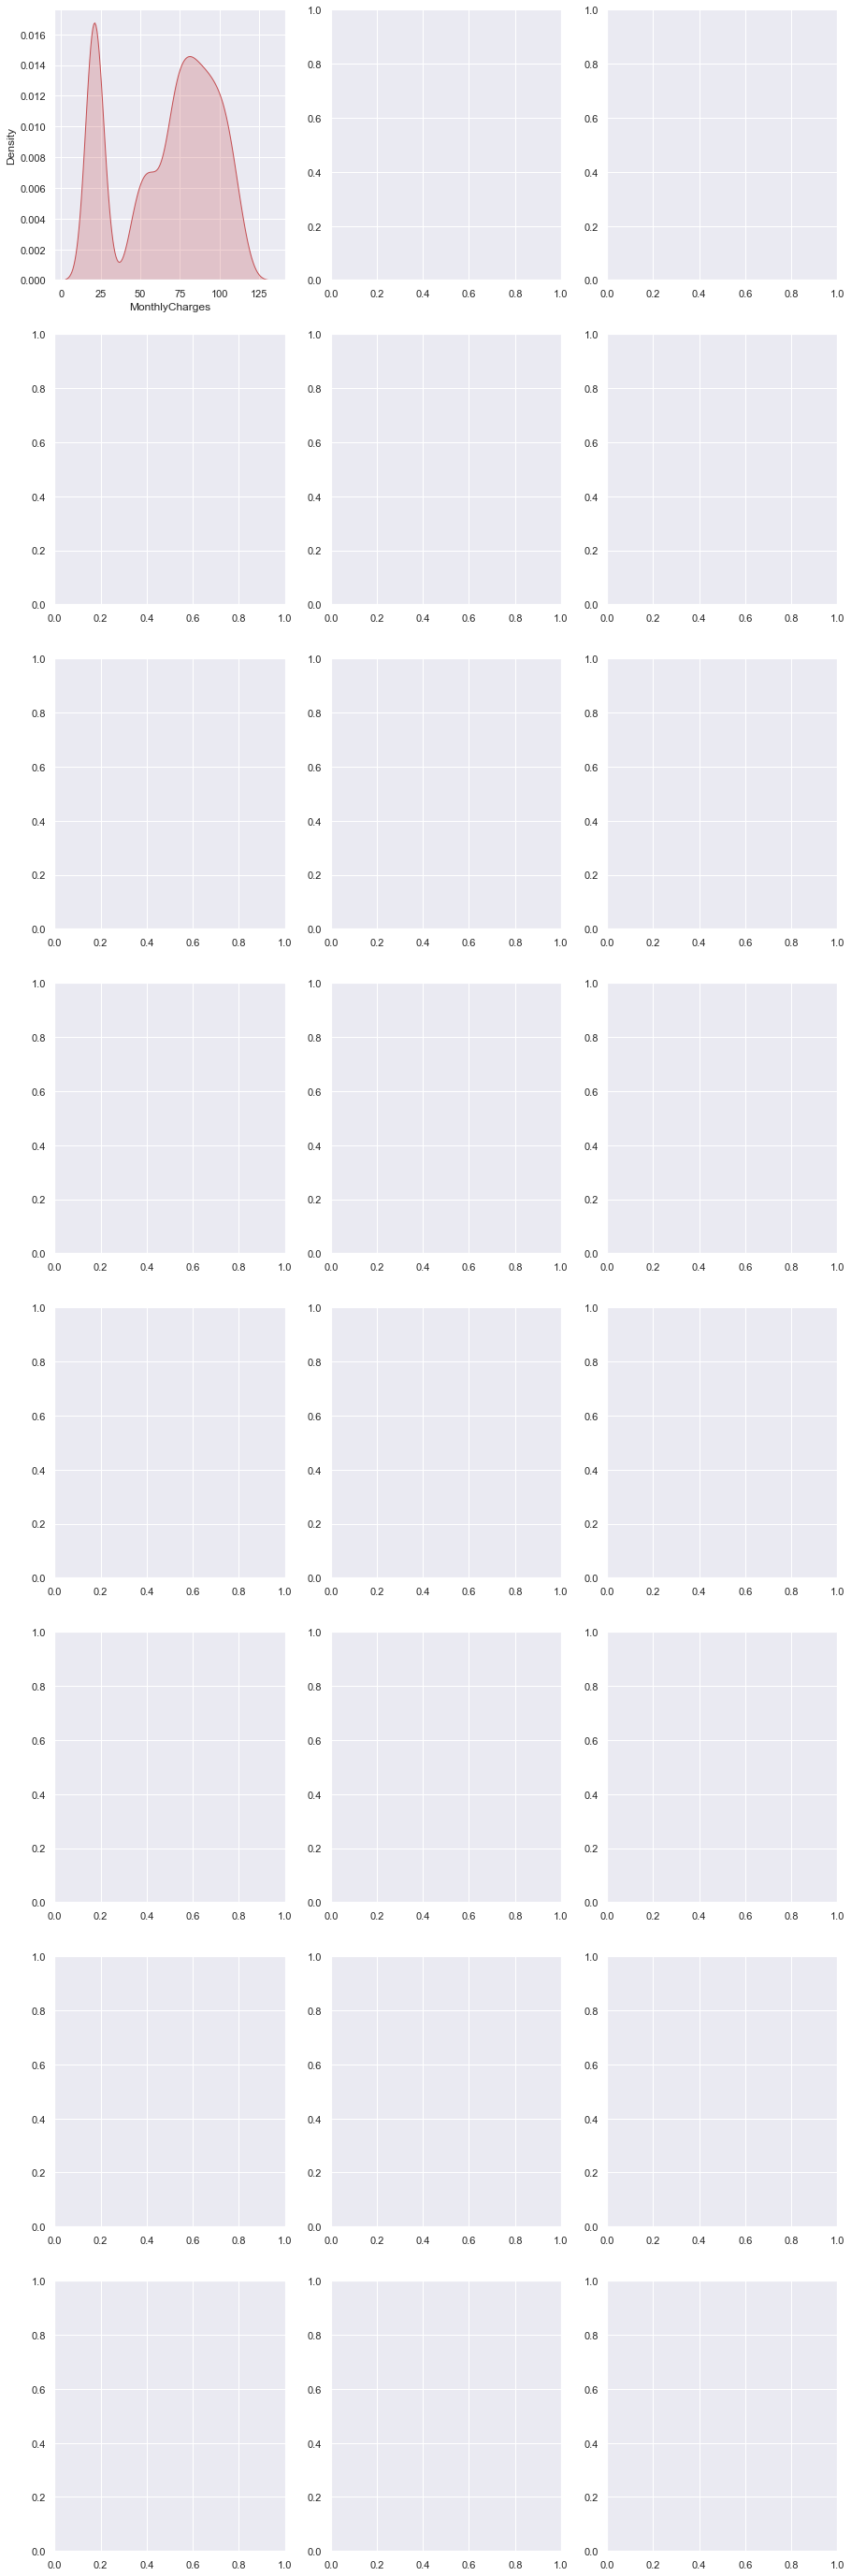

In [97]:
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[float_datatypes].items():
    sns.distplot(value, ax=ax[index], hist=False, color="r", kde_kws={"shade": True})
    index += 1
plt.show()

In [99]:
# let us now proceed further...

In [100]:
# Train-Test split

X = df.drop('Churn', axis=1)
y = df['Churn']

In [101]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,6104
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0,0,0,0,72,1,0,2,1,1,1,1,1,1,2,1,0,21.15,770
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660


In [102]:
y

1       0
2       1
4       1
5       1
6       0
       ..
7037    0
7038    0
7039    0
7041    1
7042    0
Name: Churn, Length: 6361, dtype: int32

In [103]:
# check class imbalance

In [104]:
y.value_counts()

0    4662
1    1699
Name: Churn, dtype: int64

In [105]:
# This indicates class imbalance that needed to be fixed by using the oversampling method

In [106]:
# Synthetic Minority Over-sampling Technique (SMOTE)

In [107]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [108]:
y.value_counts()

0    4662
1    4662
Name: Churn, dtype: int64

In [109]:
# class imbalance problem is solved!

In [110]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1.156726,-0.396191,-0.783216,-0.520902,0.257654,0.0,-0.938029,-1.411418,1.749867,-0.898187,1.450115,-0.765793,-1.062857,-1.067225,0.662169,-1.203015,1.459508,-0.494802,-0.967026
1,1.156726,-0.396191,-0.783216,-0.520902,-1.076461,0.0,-0.938029,-1.411418,1.749867,1.469218,-0.904207,-0.765793,-1.062857,-1.067225,-0.644787,0.831245,1.459508,-0.604134,-1.652061
2,-0.864509,-0.396191,-0.783216,-0.520902,-1.076461,0.0,-0.938029,0.121853,-0.764311,-0.898187,-0.904207,-0.765793,-1.062857,-1.067225,-0.644787,0.831245,0.455342,-0.009861,-1.250146
3,-0.864509,-0.396191,-0.783216,-0.520902,-0.826315,0.0,1.131828,0.121853,-0.764311,-0.898187,1.450115,-0.765793,1.212184,1.210629,-0.644787,0.831245,0.455342,1.011159,1.460167
4,1.156726,-0.396191,-0.783216,1.919747,-0.242639,0.0,1.131828,0.121853,-0.764311,1.469218,-0.904207,-0.765793,1.212184,-1.067225,-0.644787,0.831245,-0.548823,0.639077,-0.923066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9319,1.156726,2.524035,-0.783216,-0.520902,-0.784624,0.0,1.131828,0.121853,-0.764311,-0.898187,1.450115,-0.765793,0.074663,1.210629,-0.644787,0.831245,0.455342,0.984615,1.594139
9320,-0.864509,-0.396191,-0.783216,-0.520902,-1.118152,0.0,-0.938029,1.655123,0.492778,0.285515,0.272954,0.488644,0.074663,0.071702,-0.644787,0.831245,1.459508,-1.787568,-0.891143
9321,-0.864509,-0.396191,-0.783216,-0.520902,-0.576168,0.0,1.131828,0.121853,-0.764311,-0.898187,-0.904207,-0.765793,-1.062857,1.210629,-0.644787,0.831245,-1.552989,0.708104,-1.401911
9322,-0.864509,-0.396191,-0.783216,-0.520902,1.550078,0.0,1.131828,0.121853,1.749867,1.469218,-0.904207,1.743081,-1.062857,0.071702,0.662169,-1.203015,-0.548823,0.953473,1.005395


In [111]:
# modelling and train and test split

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

lr= LogisticRegression()
dt= DecisionTreeClassifier()
rf= RandomForestClassifier()
svc= SVC()
knc= KNeighborsClassifier()
gb= GradientBoostingClassifier()

In [112]:
# LogisticRegression

In [113]:
#best random state for logistic regression.
maxAccu= 0
maxRS= 0

for i in range(1,200):
    X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= .20, random_state= i)
    lr= LogisticRegression()
    lr.fit(X_train, y_train)
    prediction= lr.predict(X_test)
    acc= accuracy_score(y_test, prediction)
    print('accuracy', acc, 'random_state', i)
    
    if acc> maxAccu:
        maxAccu=acc
        maxRS= i
        print('max_accuracy', maxAccu, 'max_random_state', i)

accuracy 0.8 random_state 1
max_accuracy 0.8 max_random_state 1
accuracy 0.793029490616622 random_state 2
accuracy 0.8048257372654155 random_state 3
max_accuracy 0.8048257372654155 max_random_state 3
accuracy 0.8080428954423593 random_state 4
max_accuracy 0.8080428954423593 max_random_state 4
accuracy 0.8107238605898124 random_state 5
max_accuracy 0.8107238605898124 max_random_state 5
accuracy 0.7871313672922252 random_state 6
accuracy 0.8032171581769437 random_state 7
accuracy 0.7941018766756032 random_state 8
accuracy 0.8032171581769437 random_state 9
accuracy 0.7951742627345845 random_state 10
accuracy 0.7962466487935657 random_state 11
accuracy 0.7967828418230563 random_state 12
accuracy 0.8075067024128686 random_state 13
accuracy 0.8117962466487936 random_state 14
max_accuracy 0.8117962466487936 max_random_state 14
accuracy 0.8085790884718499 random_state 15
accuracy 0.7924932975871314 random_state 16
accuracy 0.8080428954423593 random_state 17
accuracy 0.8016085790884718 random_s

In [114]:
print('best accuracy is', maxAccu, 'on random_state', maxRS)

best accuracy is 0.8262734584450402 on random_state 188


In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 188)

# Training the model
lr.fit(X_train, y_train)
    
# Predicting Y_test
pred = lr.predict(X_test)
    
# Accuracy Score
acc_score = (accuracy_score(y_test, pred))*100
print("Accuracy Score:", acc_score)
    
# Classification Report
class_report = classification_report(y_test, pred)
print("\nClassification Report:\n", class_report)
    
# Cross Validation Score
cv_score = (cross_val_score(lr, X, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score: 82.62734584450402

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.82       947
           1       0.80      0.86      0.83       918

    accuracy                           0.83      1865
   macro avg       0.83      0.83      0.83      1865
weighted avg       0.83      0.83      0.83      1865

Cross Validation Score: 79.59070406977413

Accuracy Score - Cross Validation Score is 3.036641774729887


In [116]:
# DecisionTreeClassifier

In [117]:
#best random state 
maxAccu= 0
maxRS= 0

for i in range(1,200):
    X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= .20, random_state= i)
    dt= DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    prediction= dt.predict(X_test)
    acc= accuracy_score(y_test, prediction)
    print('accuracy', acc, 'random_state', i)
    
    if acc> maxAccu:
        maxAccu=acc
        maxRS= i
        print('max_accuracy', maxAccu, 'max_random_state', i)

accuracy 0.7914209115281501 random_state 1
max_accuracy 0.7914209115281501 max_random_state 1
accuracy 0.793029490616622 random_state 2
max_accuracy 0.793029490616622 max_random_state 2
accuracy 0.7914209115281501 random_state 3
accuracy 0.7919571045576408 random_state 4
accuracy 0.7892761394101877 random_state 5
accuracy 0.7898123324396783 random_state 6
accuracy 0.7908847184986595 random_state 7
accuracy 0.7957104557640751 random_state 8
max_accuracy 0.7957104557640751 max_random_state 8
accuracy 0.779088471849866 random_state 9
accuracy 0.7764075067024129 random_state 10
accuracy 0.7839142091152815 random_state 11
accuracy 0.7967828418230563 random_state 12
max_accuracy 0.7967828418230563 max_random_state 12
accuracy 0.7812332439678285 random_state 13
accuracy 0.7908847184986595 random_state 14
accuracy 0.7903485254691689 random_state 15
accuracy 0.8 random_state 16
max_accuracy 0.8 max_random_state 16
accuracy 0.7919571045576408 random_state 17
accuracy 0.8075067024128686 random_st

In [118]:
print('best accuracy is', maxAccu, 'on random_state', maxRS)

best accuracy is 0.8117962466487936 on random_state 143


In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 143)

# Training the model
dt.fit(X_train, y_train)
    
# Predicting Y_test
pred = dt.predict(X_test)
    
# Accuracy Score
acc_score = (accuracy_score(y_test, pred))*100
print("Accuracy Score:", acc_score)
    
# Classification Report
class_report = classification_report(y_test, pred)
print("\nClassification Report:\n", class_report)
    
# Cross Validation Score
cv_score = (cross_val_score(dt, X, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", abs(result))

Accuracy Score: 80.80428954423593

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80       914
           1       0.80      0.83      0.82       951

    accuracy                           0.81      1865
   macro avg       0.81      0.81      0.81      1865
weighted avg       0.81      0.81      0.81      1865

Cross Validation Score: 78.37929328377959

Accuracy Score - Cross Validation Score is 2.4249962604563393


In [120]:
# RandomForestClassifier

In [121]:
#best random state 
maxAccu= 0
maxRS= 0

for i in range(1,200):
    X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= .20, random_state= i)
    rf= RandomForestClassifier()
    rf.fit(X_train, y_train)
    prediction= rf.predict(X_test)
    acc= accuracy_score(y_test, prediction)
    print('accuracy', acc, 'random_state', i)
    
    if acc> maxAccu:
        maxAccu=acc
        maxRS= i
        print('max_accuracy', maxAccu, 'max_random_state', i)

accuracy 0.839142091152815 random_state 1
max_accuracy 0.839142091152815 max_random_state 1
accuracy 0.8369973190348525 random_state 2
accuracy 0.8423592493297587 random_state 3
max_accuracy 0.8423592493297587 max_random_state 3
accuracy 0.8509383378016085 random_state 4
max_accuracy 0.8509383378016085 max_random_state 4
accuracy 0.8466487935656837 random_state 5
accuracy 0.8353887399463807 random_state 6
accuracy 0.8568364611260053 random_state 7
max_accuracy 0.8568364611260053 max_random_state 7
accuracy 0.84343163538874 random_state 8
accuracy 0.8412868632707775 random_state 9
accuracy 0.8364611260053619 random_state 10
accuracy 0.850402144772118 random_state 11
accuracy 0.8412868632707775 random_state 12
accuracy 0.8487935656836462 random_state 13
accuracy 0.8552278820375335 random_state 14
accuracy 0.8520107238605898 random_state 15
accuracy 0.8541554959785522 random_state 16
accuracy 0.8525469168900804 random_state 17
accuracy 0.8632707774798928 random_state 18
max_accuracy 0.863

In [122]:
print('best accuracy is', maxAccu, 'on random_state', maxRS)

best accuracy is 0.8718498659517426 on random_state 136


In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 136)

# Training the model
rf.fit(X_train, y_train)
    
# Predicting Y_test
pred = rf.predict(X_test)
    
# Accuracy Score
acc_score = (accuracy_score(y_test, pred))*100
print("Accuracy Score:", acc_score)
    
# Classification Report
class_report = classification_report(y_test, pred)
print("\nClassification Report:\n", class_report)
    
# Cross Validation Score
cv_score = (cross_val_score(rf, X, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", abs(result))

Accuracy Score: 86.8632707774799

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.86       909
           1       0.87      0.88      0.87       956

    accuracy                           0.87      1865
   macro avg       0.87      0.87      0.87      1865
weighted avg       0.87      0.87      0.87      1865

Cross Validation Score: 83.9239376819432

Accuracy Score - Cross Validation Score is 2.9393330955366963


In [124]:
# SVC

In [125]:
#best random state 
maxAccu= 0
maxRS= 0

for i in range(1,200):
    X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= .20, random_state= i)
    svc= RandomForestClassifier()
    svc.fit(X_train, y_train)
    prediction= svc.predict(X_test)
    acc= accuracy_score(y_test, prediction)
    print('accuracy', acc, 'random_state', i)
    
    if acc> maxAccu:
        maxAccu=acc
        maxRS= i
        print('max_accuracy', maxAccu, 'max_random_state', i)

accuracy 0.8386058981233244 random_state 1
max_accuracy 0.8386058981233244 max_random_state 1
accuracy 0.8386058981233244 random_state 2
accuracy 0.8423592493297587 random_state 3
max_accuracy 0.8423592493297587 max_random_state 3
accuracy 0.850402144772118 random_state 4
max_accuracy 0.850402144772118 max_random_state 4
accuracy 0.8482573726541555 random_state 5
accuracy 0.8337801608579088 random_state 6
accuracy 0.8621983914209115 random_state 7
max_accuracy 0.8621983914209115 max_random_state 7
accuracy 0.8396782841823056 random_state 8
accuracy 0.8418230563002681 random_state 9
accuracy 0.8380697050938338 random_state 10
accuracy 0.850402144772118 random_state 11
accuracy 0.8455764075067024 random_state 12
accuracy 0.8364611260053619 random_state 13
accuracy 0.8493297587131368 random_state 14
accuracy 0.850402144772118 random_state 15
accuracy 0.8568364611260053 random_state 16
accuracy 0.8552278820375335 random_state 17
accuracy 0.8605898123324397 random_state 18
accuracy 0.855764

In [126]:
print('best accuracy is', maxAccu, 'on random_state', maxRS)

best accuracy is 0.8702412868632707 on random_state 136


In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 136)

# Training the model
svc.fit(X_train, y_train)
    
# Predicting Y_test
pred = svc.predict(X_test)
    
# Accuracy Score
acc_score = (accuracy_score(y_test, pred))*100
print("Accuracy Score:", acc_score)
    
# Classification Report
class_report = classification_report(y_test, pred)
print("\nClassification Report:\n", class_report)
    
# Cross Validation Score
cv_score = (cross_val_score(svc, X, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score: 87.5603217158177

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       909
           1       0.88      0.88      0.88       956

    accuracy                           0.88      1865
   macro avg       0.88      0.88      0.88      1865
weighted avg       0.88      0.88      0.88      1865

Cross Validation Score: 83.95613802943309

Accuracy Score - Cross Validation Score is 3.6041836863846015


In [128]:
# ensemble techniques

In [129]:
# BaggingClassifier

from sklearn.ensemble import BaggingClassifier
bag= BaggingClassifier()

In [131]:
#best random state 
maxAccu= 0
maxRS= 0

for i in range(1,200):
    X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= .20, random_state= i)
    bag= BaggingClassifier()
    bag.fit(X_train, y_train)
    prediction= bag.predict(X_test)
    acc= accuracy_score(y_test, prediction)
    print('accuracy', acc, 'random_state', i)
    
    if acc> maxAccu:
        maxAccu=acc
        maxRS= i
        print('max_accuracy', maxAccu, 'max_random_state', i)

accuracy 0.8176943699731903 random_state 1
max_accuracy 0.8176943699731903 max_random_state 1
accuracy 0.8369973190348525 random_state 2
max_accuracy 0.8369973190348525 max_random_state 2
accuracy 0.8327077747989277 random_state 3
accuracy 0.8353887399463807 random_state 4
accuracy 0.8284182305630027 random_state 5
accuracy 0.8117962466487936 random_state 6
accuracy 0.8428954423592493 random_state 7
max_accuracy 0.8428954423592493 max_random_state 7
accuracy 0.825201072386059 random_state 8
accuracy 0.8235924932975871 random_state 9
accuracy 0.8171581769436997 random_state 10
accuracy 0.8278820375335121 random_state 11
accuracy 0.8332439678284183 random_state 12
accuracy 0.8289544235924933 random_state 13
accuracy 0.8396782841823056 random_state 14
accuracy 0.8327077747989277 random_state 15
accuracy 0.8407506702412869 random_state 16
accuracy 0.8273458445040215 random_state 17
accuracy 0.8455764075067024 random_state 18
max_accuracy 0.8455764075067024 max_random_state 18
accuracy 0.83

In [132]:
print('best accuracy is', maxAccu, 'on random_state', maxRS)

best accuracy is 0.8563002680965147 on random_state 57


In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 57)

# Training the model
bag.fit(X_train, y_train)
    
# Predicting Y_test
pred = bag.predict(X_test)
    
# Accuracy Score
acc_score = (accuracy_score(y_test, pred))*100
print("Accuracy Score:", acc_score)
    
# Classification Report
class_report = classification_report(y_test, pred)
print("\nClassification Report:\n", class_report)
    
# Cross Validation Score
cv_score = (cross_val_score(svc, X, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", abs(result))

Accuracy Score: 84.55764075067023

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       952
           1       0.85      0.83      0.84       913

    accuracy                           0.85      1865
   macro avg       0.85      0.85      0.85      1865
weighted avg       0.85      0.85      0.85      1865

Cross Validation Score: 83.99898744663959

Accuracy Score - Cross Validation Score is 0.5586533040306421


In [130]:
# AdaBoostClassifier

from sklearn.ensemble import AdaBoostClassifier
ada= AdaBoostClassifier()

In [134]:
#best random state 
maxAccu= 0
maxRS= 0

for i in range(1,200):
    X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= .20, random_state= i)
    ada= AdaBoostClassifier()
    ada.fit(X_train, y_train)
    prediction= ada.predict(X_test)
    acc= accuracy_score(y_test, prediction)
    print('accuracy', acc, 'random_state', i)
    
    if acc> maxAccu:
        maxAccu=acc
        maxRS= i
        print('max_accuracy', maxAccu, 'max_random_state', i)

accuracy 0.8225201072386059 random_state 1
max_accuracy 0.8225201072386059 max_random_state 1
accuracy 0.8171581769436997 random_state 2
accuracy 0.8257372654155496 random_state 3
max_accuracy 0.8257372654155496 max_random_state 3
accuracy 0.83485254691689 random_state 4
max_accuracy 0.83485254691689 max_random_state 4
accuracy 0.8316353887399464 random_state 5
accuracy 0.8085790884718499 random_state 6
accuracy 0.8235924932975871 random_state 7
accuracy 0.8203753351206434 random_state 8
accuracy 0.8294906166219839 random_state 9
accuracy 0.8219839142091153 random_state 10
accuracy 0.8166219839142091 random_state 11
accuracy 0.8101876675603217 random_state 12
accuracy 0.8187667560321715 random_state 13
accuracy 0.8262734584450402 random_state 14
accuracy 0.8289544235924933 random_state 15
accuracy 0.8128686327077748 random_state 16
accuracy 0.8294906166219839 random_state 17
accuracy 0.8176943699731903 random_state 18
accuracy 0.8300268096514746 random_state 19
accuracy 0.8166219839142

In [135]:
print('best accuracy is', maxAccu, 'on random_state', maxRS)

best accuracy is 0.8471849865951743 on random_state 182


In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 182)

# Training the model
ada.fit(X_train, y_train)
    
# Predicting Y_test
pred = ada.predict(X_test)
    
# Accuracy Score
acc_score = (accuracy_score(y_test, pred))*100
print("Accuracy Score:", acc_score)
    
# Classification Report
class_report = classification_report(y_test, pred)
print("\nClassification Report:\n", class_report)
    
# Cross Validation Score
cv_score = (cross_val_score(svc, X, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", abs(result))

Accuracy Score: 84.71849865951742

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.81      0.84       947
           1       0.82      0.89      0.85       918

    accuracy                           0.85      1865
   macro avg       0.85      0.85      0.85      1865
weighted avg       0.85      0.85      0.85      1865

Cross Validation Score: 84.0204409209633

Accuracy Score - Cross Validation Score is 0.6980577385541267


In [ ]:
# GradientBoostingClassifier

from sklearn.ensemble import GradientBoostingClassifier
gb= GradientBoostingClassifier()

In [137]:
#best random state 
maxAccu= 0
maxRS= 0

for i in range(1,200):
    X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= .20, random_state= i)
    gb= GradientBoostingClassifier()
    gb.fit(X_train, y_train)
    prediction= gb.predict(X_test)
    acc= accuracy_score(y_test, prediction)
    print('accuracy', acc, 'random_state', i)
    
    if acc> maxAccu:
        maxAccu=acc
        maxRS= i
        print('max_accuracy', maxAccu, 'max_random_state', i)

accuracy 0.8316353887399464 random_state 1
max_accuracy 0.8316353887399464 max_random_state 1
accuracy 0.8284182305630027 random_state 2
accuracy 0.8380697050938338 random_state 3
max_accuracy 0.8380697050938338 max_random_state 3
accuracy 0.8412868632707775 random_state 4
max_accuracy 0.8412868632707775 max_random_state 4
accuracy 0.8461126005361931 random_state 5
max_accuracy 0.8461126005361931 max_random_state 5
accuracy 0.8214477211796246 random_state 6
accuracy 0.8300268096514746 random_state 7
accuracy 0.8316353887399464 random_state 8
accuracy 0.839142091152815 random_state 9
accuracy 0.8294906166219839 random_state 10
accuracy 0.8337801608579088 random_state 11
accuracy 0.8268096514745308 random_state 12
accuracy 0.8289544235924933 random_state 13
accuracy 0.8310991957104558 random_state 14
accuracy 0.8337801608579088 random_state 15
accuracy 0.8380697050938338 random_state 16
accuracy 0.8402144772117962 random_state 17
accuracy 0.8412868632707775 random_state 18
accuracy 0.840

In [138]:
print('best accuracy is', maxAccu, 'on random_state', maxRS)

best accuracy is 0.8552278820375335 on random_state 136


In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 136)

# Training the model
gb.fit(X_train, y_train)
    
# Predicting Y_test
pred = gb.predict(X_test)
    
# Accuracy Score
acc_score = (accuracy_score(y_test, pred))*100
print("Accuracy Score:", acc_score)
    
# Classification Report
class_report = classification_report(y_test, pred)
print("\nClassification Report:\n", class_report)
    
# Cross Validation Score
cv_score = (cross_val_score(svc, X, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", abs(result))

Accuracy Score: 85.52278820375335

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85       909
           1       0.84      0.88      0.86       956

    accuracy                           0.86      1865
   macro avg       0.86      0.85      0.85      1865
weighted avg       0.86      0.86      0.86      1865

Cross Validation Score: 83.96685038373471

Accuracy Score - Cross Validation Score is 1.5559378200186416


In [140]:
# Let us now check the AUC and ROC

In [141]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

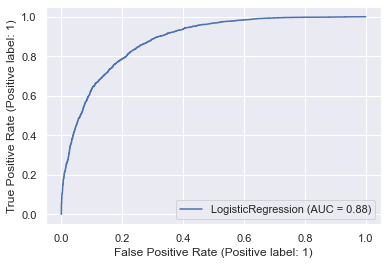

In [142]:
disp= plot_roc_curve(lr, X_train, y_train)

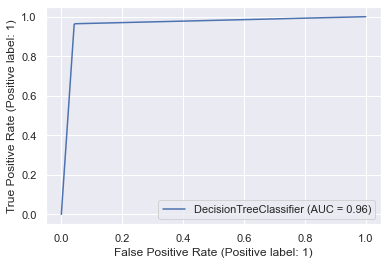

In [143]:
disp= plot_roc_curve(dt, X_train, y_train)

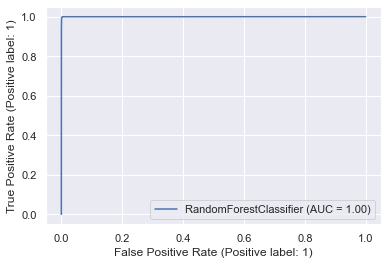

In [144]:
disp= plot_roc_curve(rf, X_train, y_train)

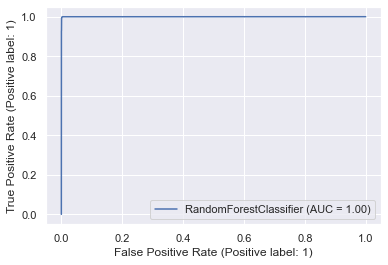

In [145]:
disp= plot_roc_curve(svc, X_train, y_train)

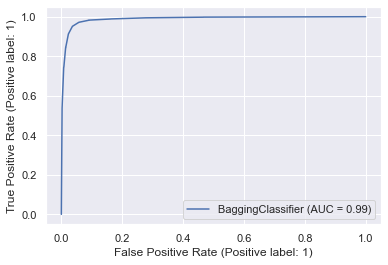

In [146]:
disp= plot_roc_curve(bag, X_train, y_train)

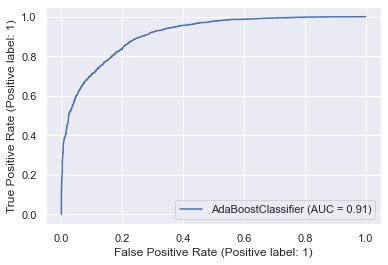

In [147]:
disp= plot_roc_curve(ada, X_train, y_train)

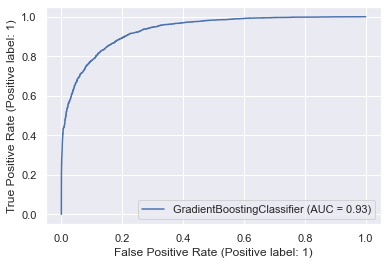

In [148]:
disp= plot_roc_curve(gb, X_train, y_train)

In [149]:
# considering all the above models, we can conclude Support Vector Classifier is the best model for our problem.
# Let us proceed with this model...

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 136)

# Training the model
svc.fit(X_train, y_train)
    
# Predicting Y_test
pred = svc.predict(X_test)
    
# Accuracy Score
acc_score = (accuracy_score(y_test, pred))*100
print("Accuracy Score:", acc_score)
    
# Classification Report
class_report = classification_report(y_test, pred)
print("\nClassification Report:\n", class_report)
    
# Cross Validation Score
cv_score = (cross_val_score(svc, X, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score: 87.1313672922252

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       909
           1       0.87      0.88      0.87       956

    accuracy                           0.87      1865
   macro avg       0.87      0.87      0.87      1865
weighted avg       0.87      0.87      0.87      1865

Cross Validation Score: 84.05260674958865

Accuracy Score - Cross Validation Score is 3.0787605426365587


In [151]:
# check train and test score for SVC
y_pred= svc.predict(X_train)
pred= svc.predict(X_test)
train_result= accuracy_score(y_train, y_pred)*100
test_result= accuracy_score(y_test, pred)*100

In [152]:
train_result

99.83912052553961

In [153]:
test_result

87.1313672922252

In [154]:
#Hyperparameter tuning for SVC

In [155]:
from sklearn.model_selection import GridSearchCV

params={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']}

svc2= SVC()

svcgrid=GridSearchCV(svc2,param_grid=params,cv=4)
svcgrid.fit(X_train,y_train)  
      
print(svcgrid.best_params_)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [156]:
svc2= SVC(C= 100, gamma= 0.01, kernel= 'rbf')
svc2.fit(X_train, y_train)
svc2.score(X_train, y_train)
pred_decision= svc2.predict(X_test)

# Accuracy Score
acc_score = (accuracy_score(y_test, pred_decision))*100
print("Accuracy Score:", acc_score)
    
# Classification Report
class_report = classification_report(y_test, pred_decision)
print("\nClassification Report:\n", class_report)
    
# Cross Validation Score
cv_score = (cross_val_score(svc2, X, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score: 85.14745308310991

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.85       909
           1       0.85      0.87      0.86       956

    accuracy                           0.85      1865
   macro avg       0.85      0.85      0.85      1865
weighted avg       0.85      0.85      0.85      1865

Cross Validation Score: 81.71456350895762

Accuracy Score - Cross Validation Score is 3.4328895741522842


In [157]:
# Conclusion

In [158]:
import pickle
filename= 'churn.pkl'
pickle.dump(svc2, open(filename, 'wb'))

In [159]:
[]

[]

In [160]:
loaded_model=pickle.load(open('churn.pkl','rb'))
result= loaded_model.score(X_test, y_test)
print(result*100)

85.14745308310991


In [161]:
conclusion= pd.DataFrame([loaded_model.predict(X_test)[:],pred_decision[:]], index=['Predicted','Original'])

In [162]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1855,1856,1857,1858,1859,1860,1861,1862,1863,1864
Predicted,0,1,0,1,0,1,0,1,1,1,...,0,1,1,0,0,1,0,1,1,1
Original,0,1,0,1,0,1,0,1,1,1,...,0,1,1,0,0,1,0,1,1,1
